In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings

In [2]:
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
pd.options.display.max_colwidth = 250

In [3]:
train = pd.read_csv("train.csv")
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [4]:
train = train.drop(columns = ['Id'])

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
train.isnull().sum().sort_values()

MSSubClass          0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
BsmtUnfSF           0
3SsnPorch           0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
GarageCars          0
Fireplaces          0
EnclosedPorch       0
BsmtFinSF2          0
HeatingQC           0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1

In [7]:
train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [8]:
train.corr(method ='pearson', numeric_only = True)

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

In [9]:
s = (train.dtypes == 'object')
object_cols = list(s[s].index)

df = [train]
df_combined = pd.concat(df).reset_index(drop=True)

basement_cols=[col for col in train.columns if 'Bsmt' in col]

/tmp/ipykernel_227861/3467442725.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


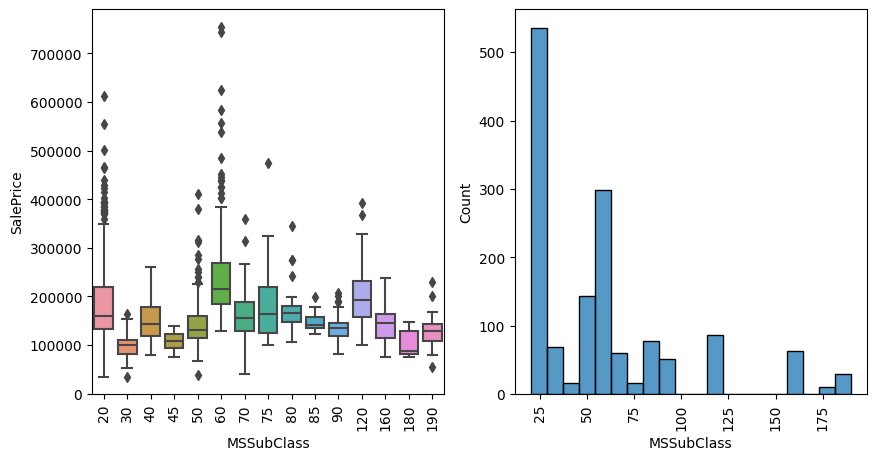

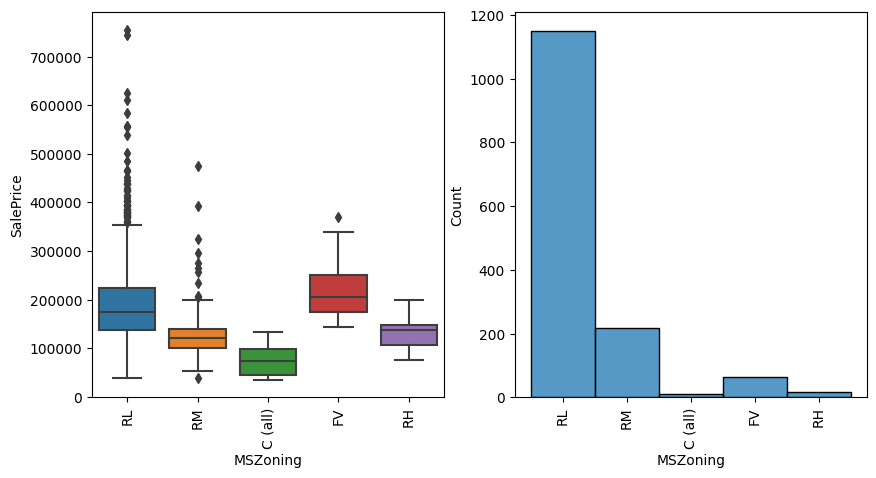

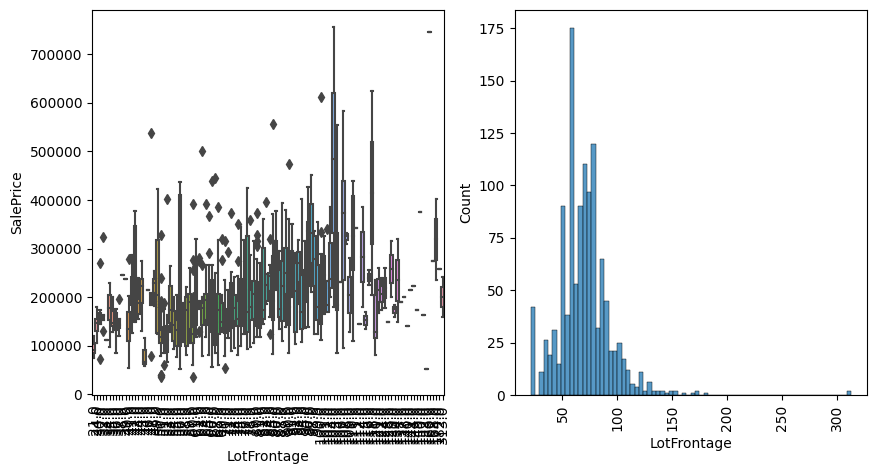

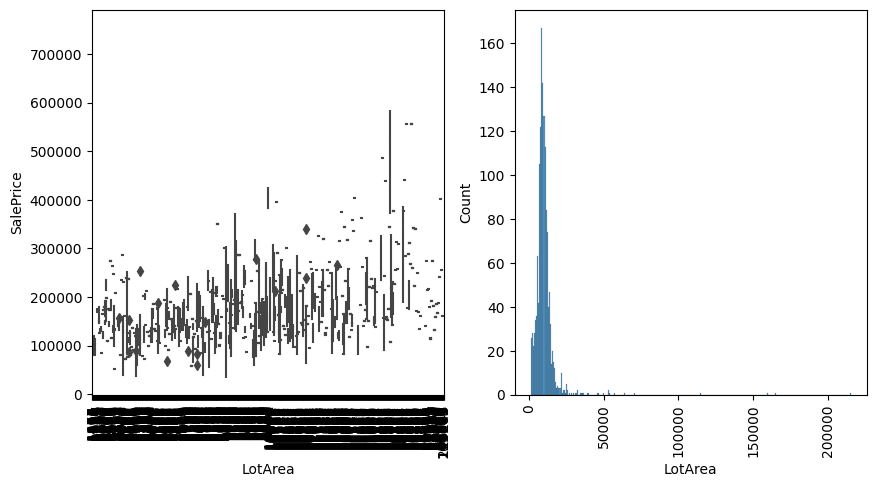

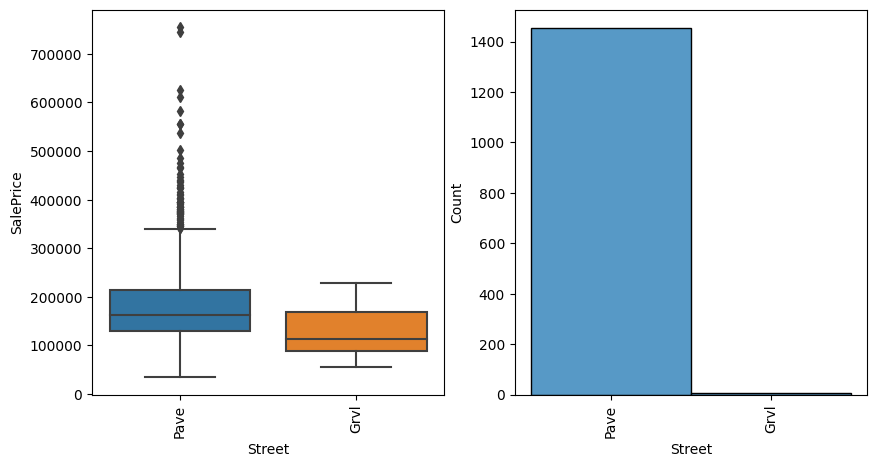

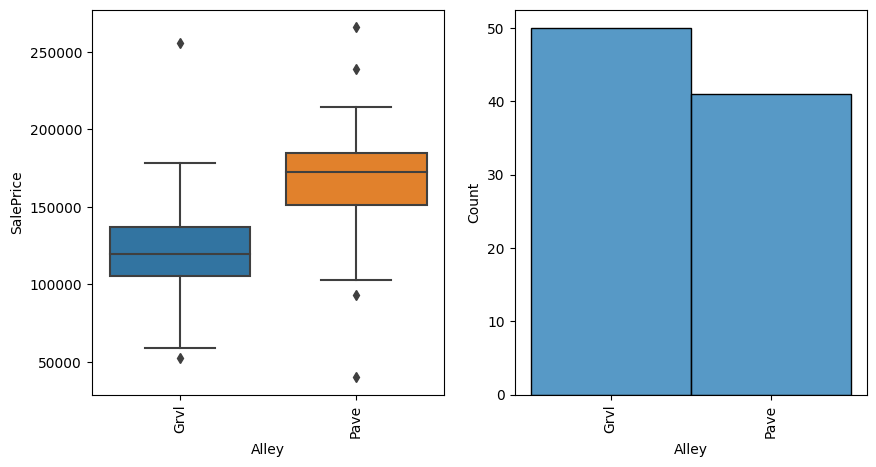

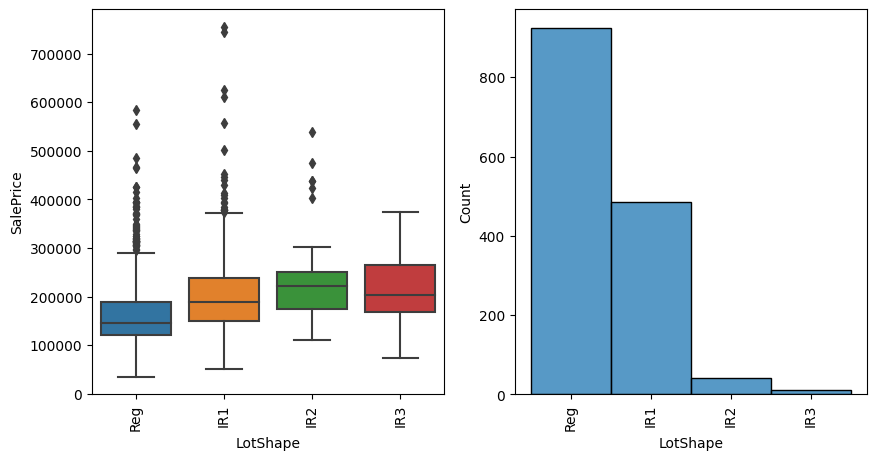

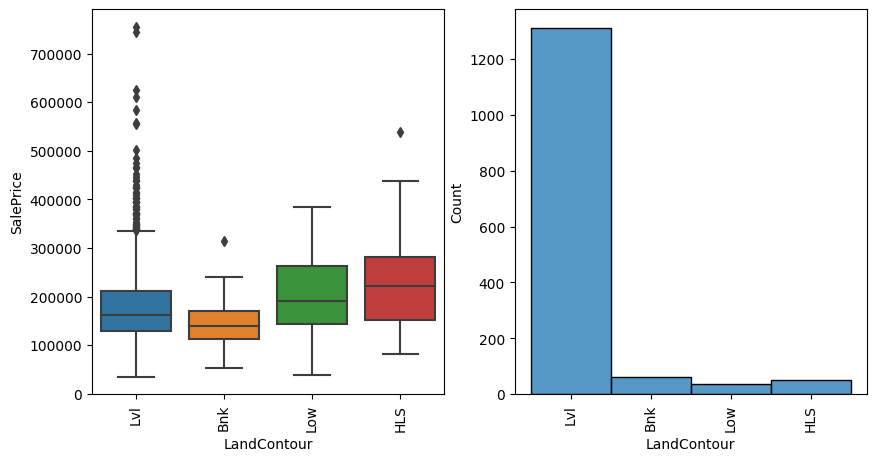

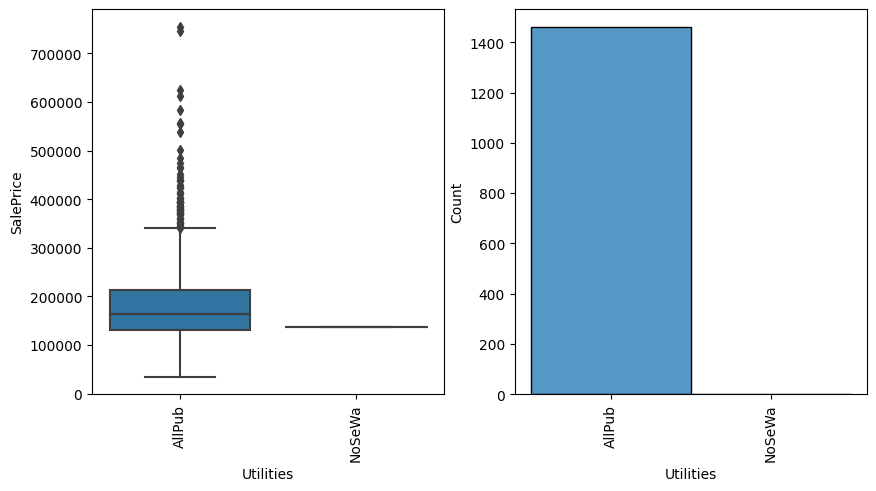

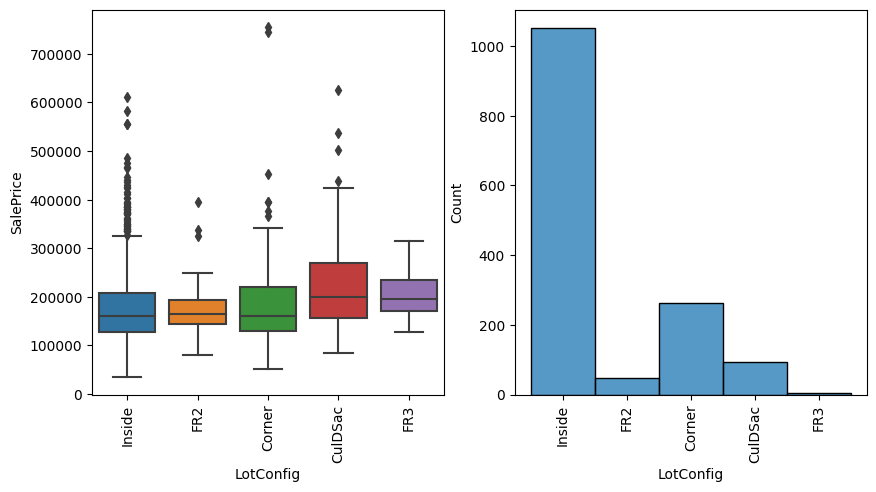

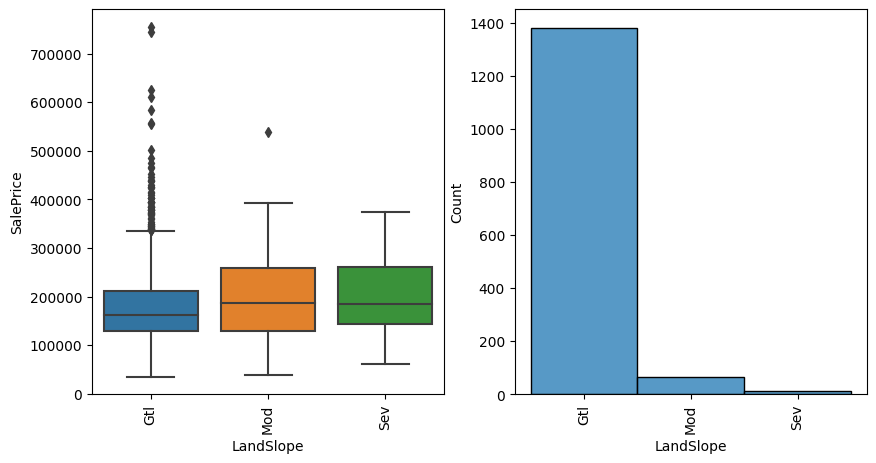

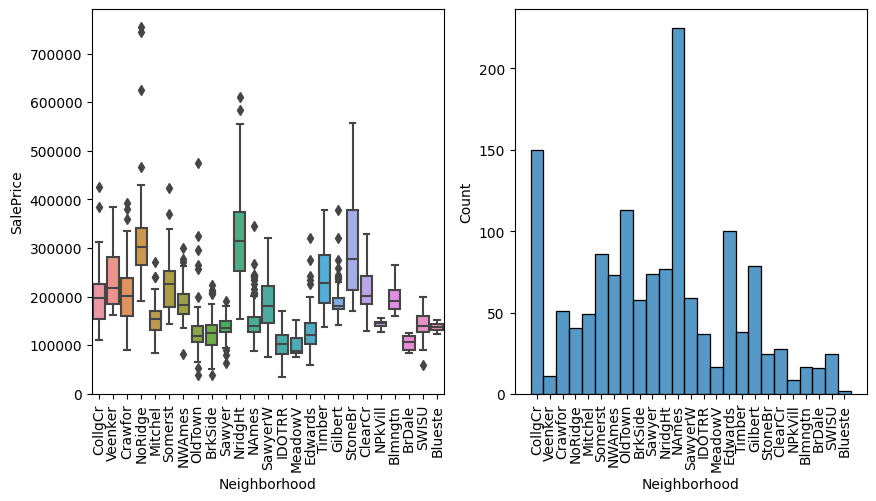

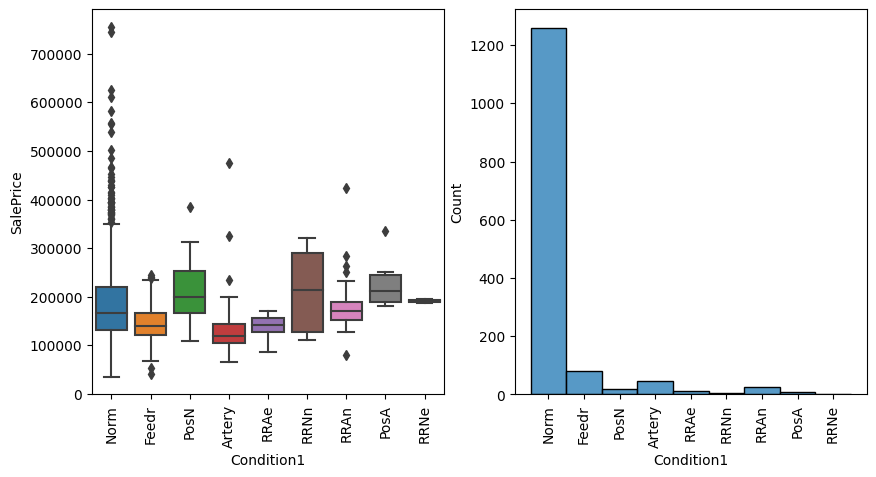

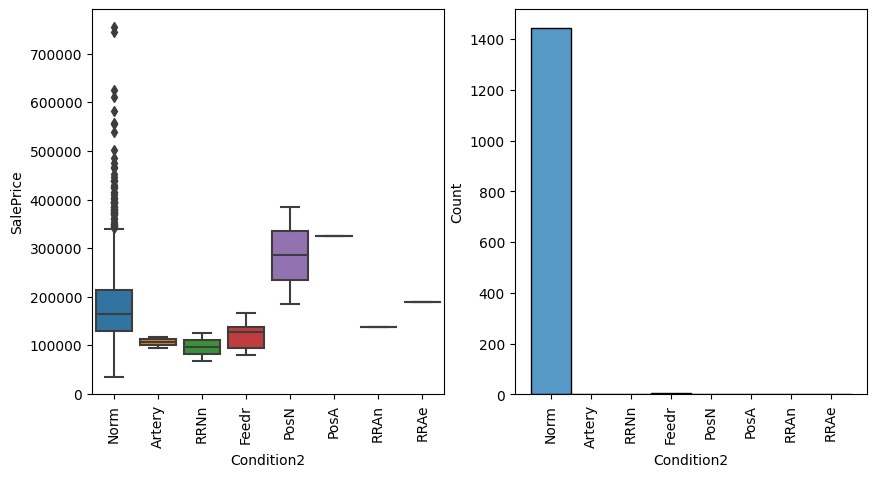

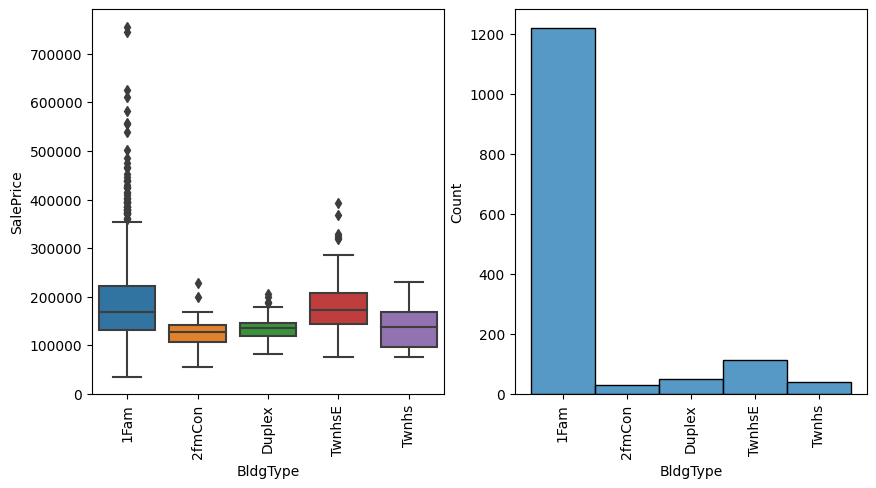

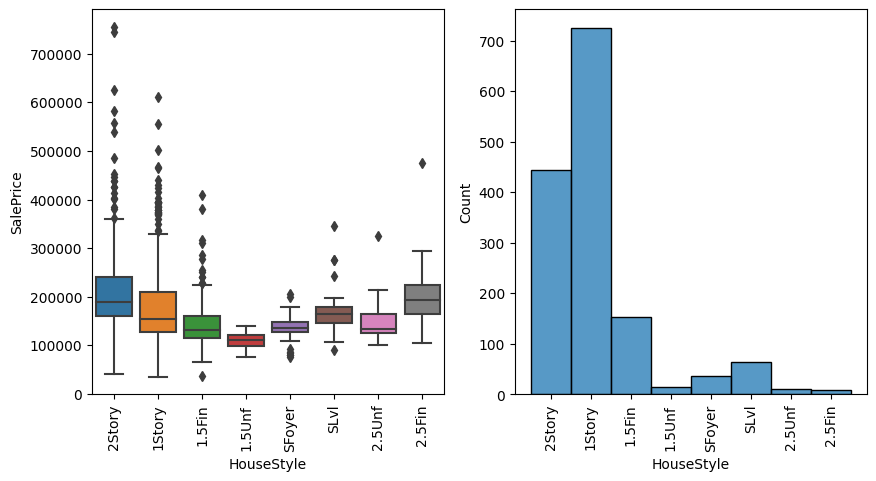

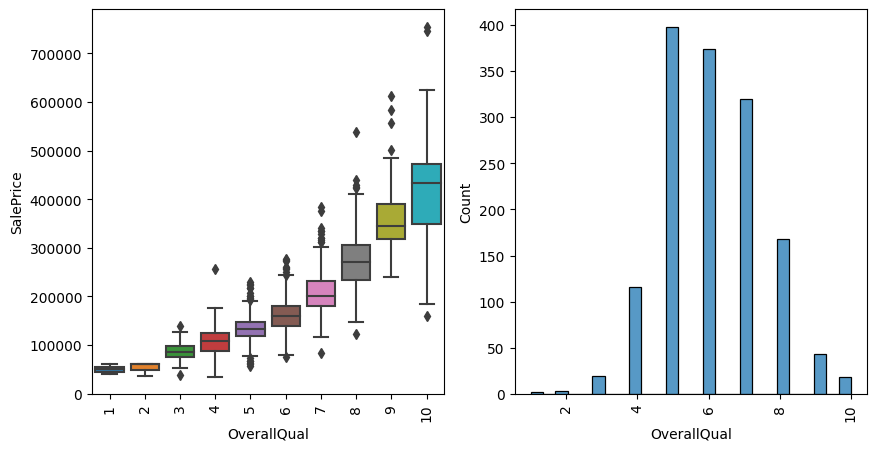

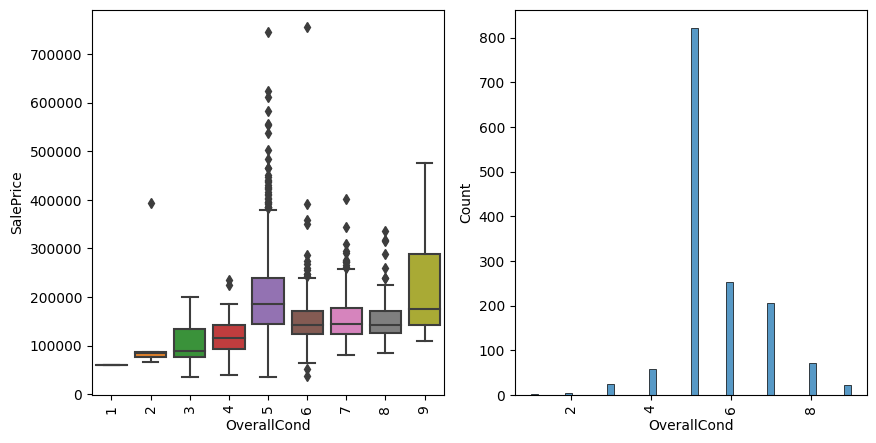

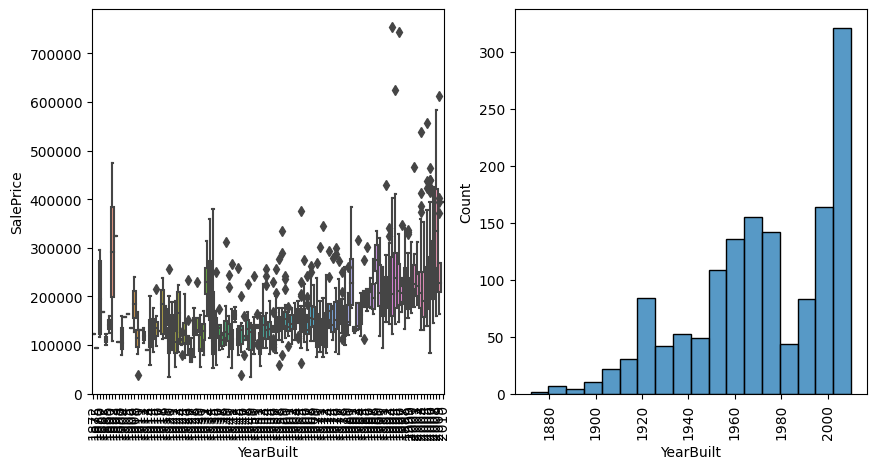

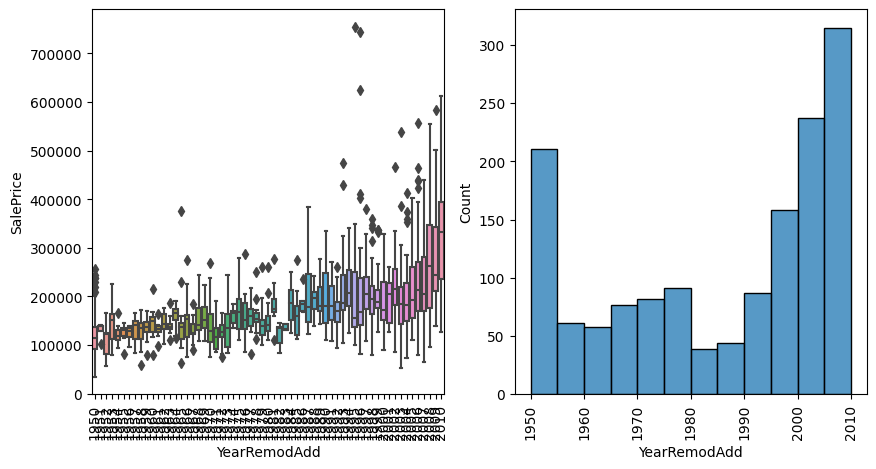

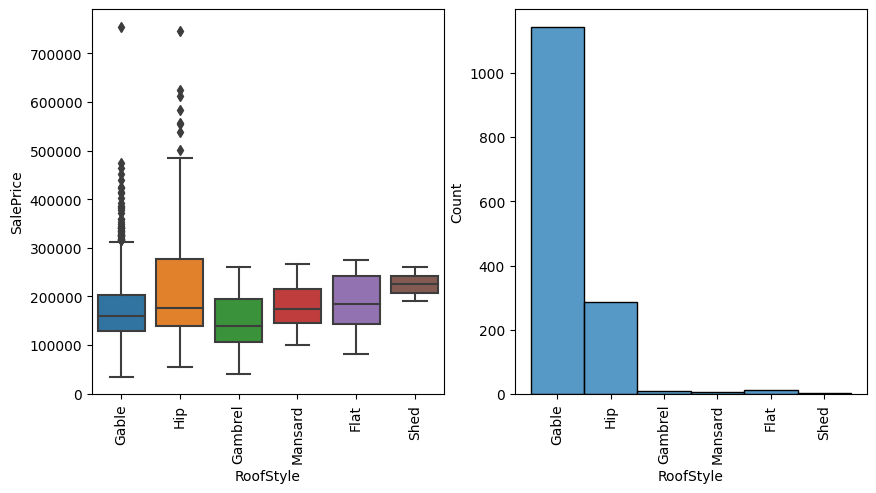

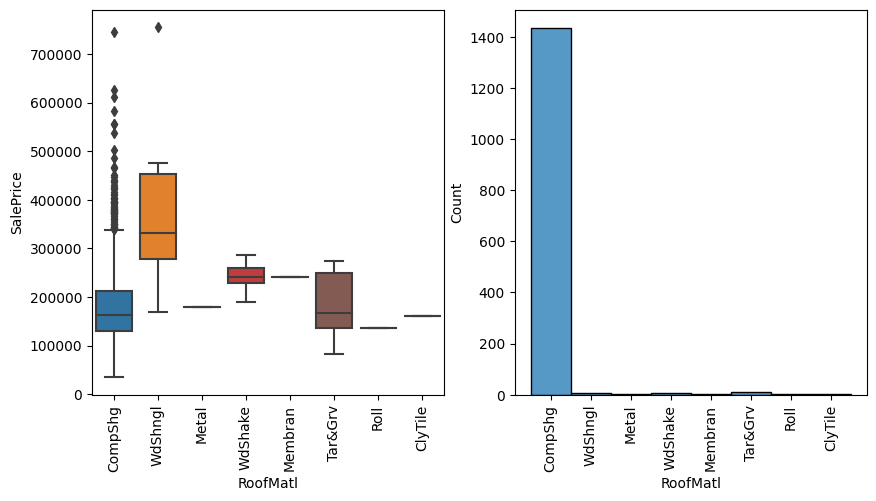

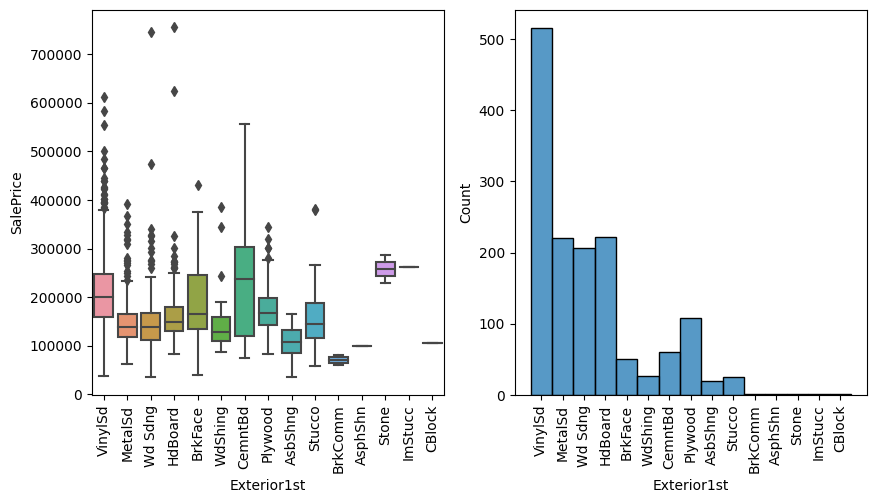

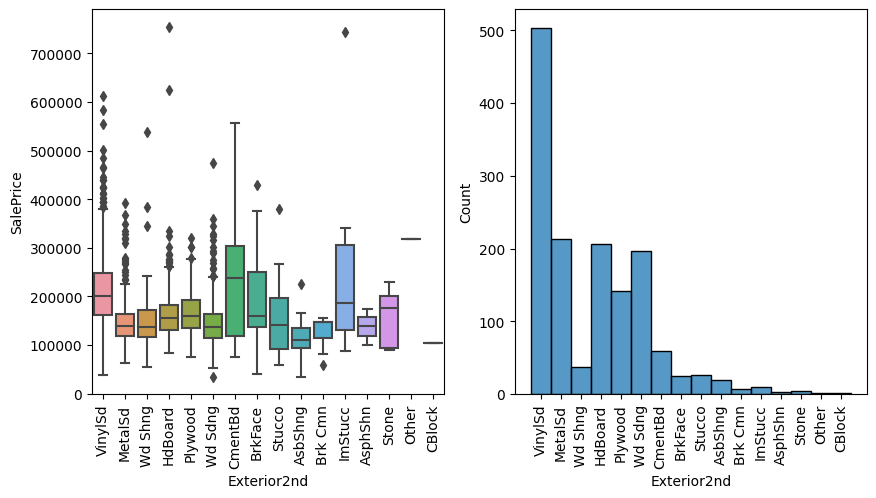

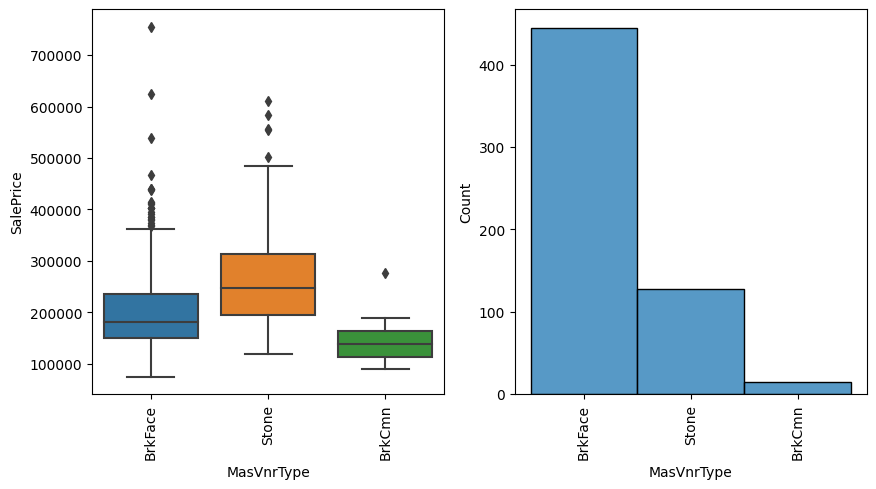

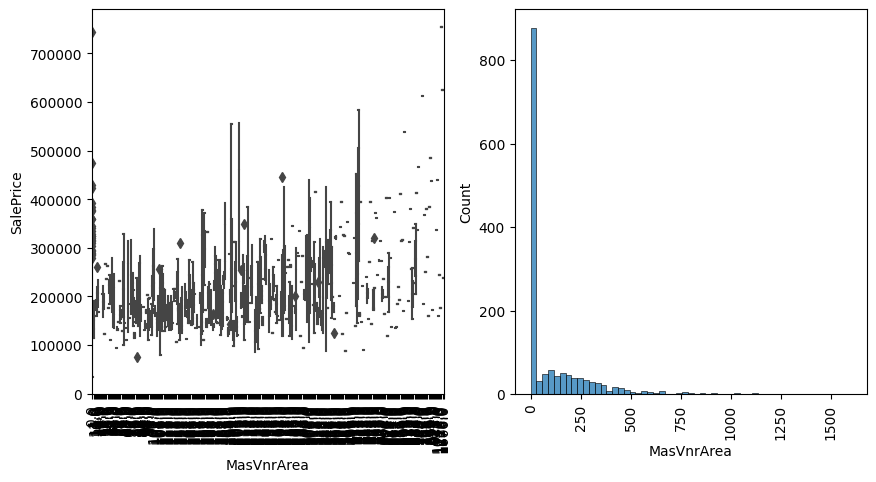

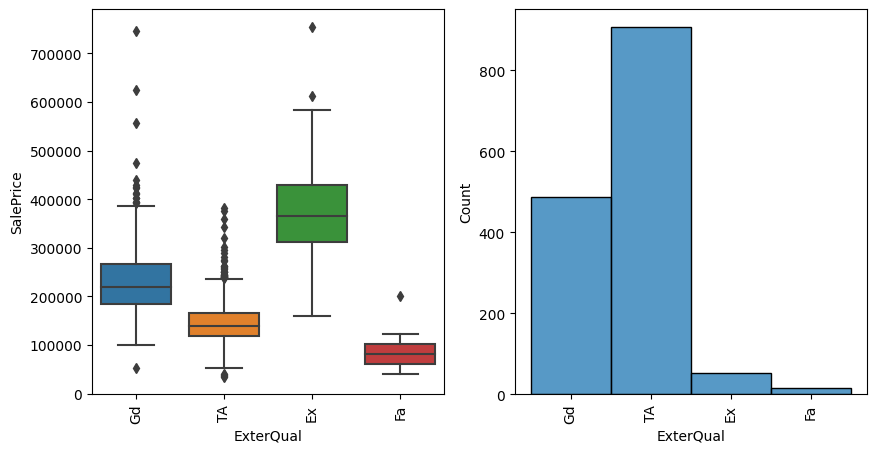

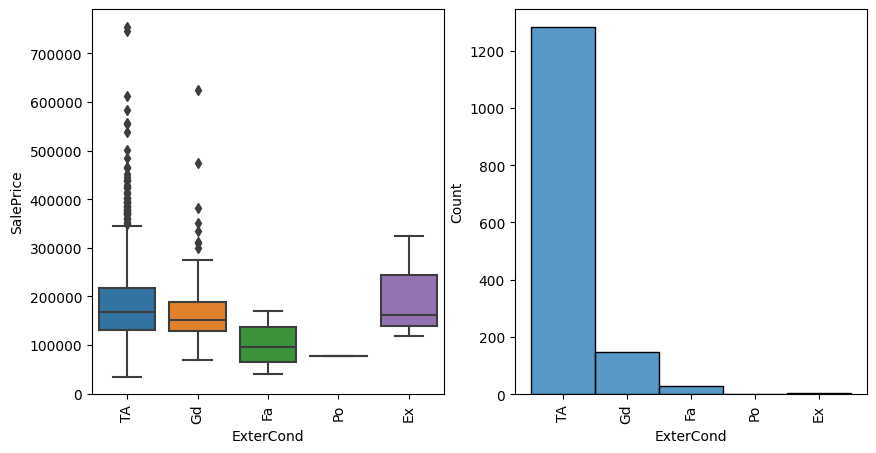

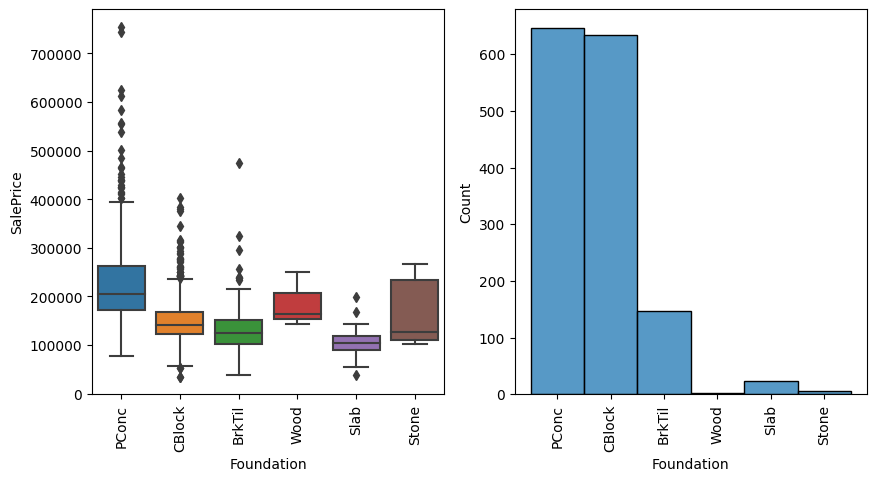

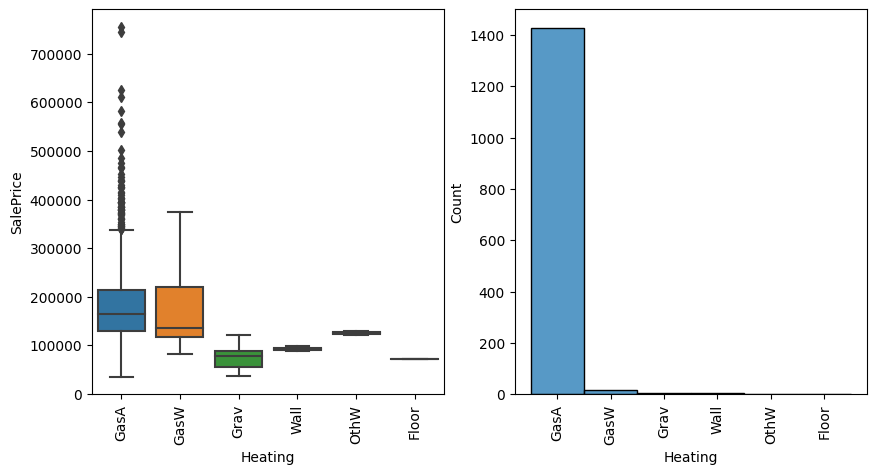

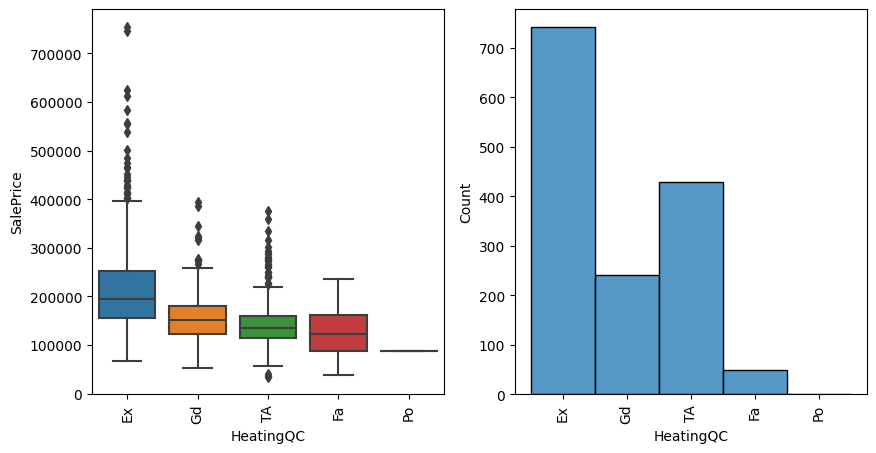

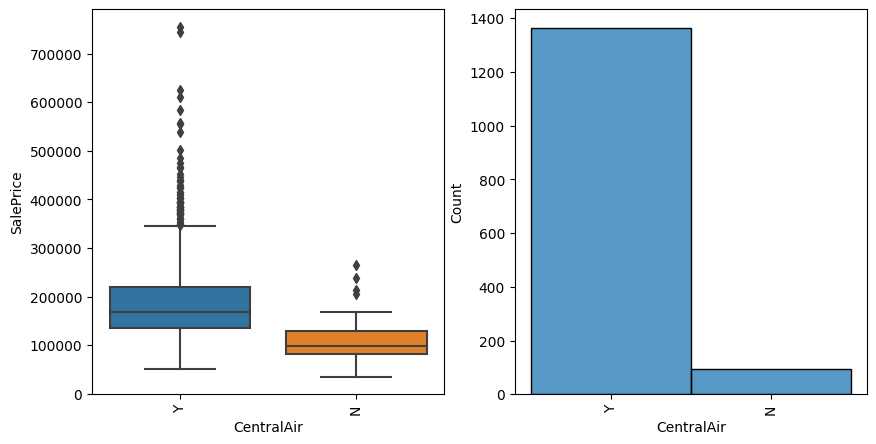

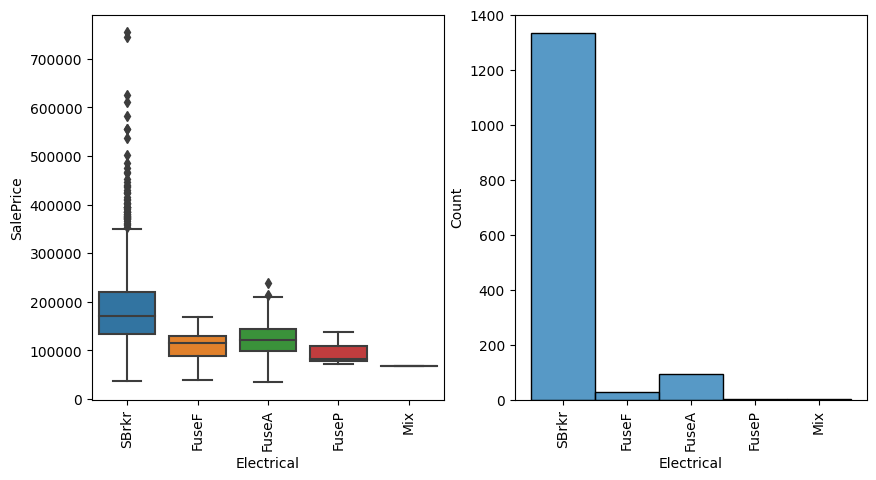

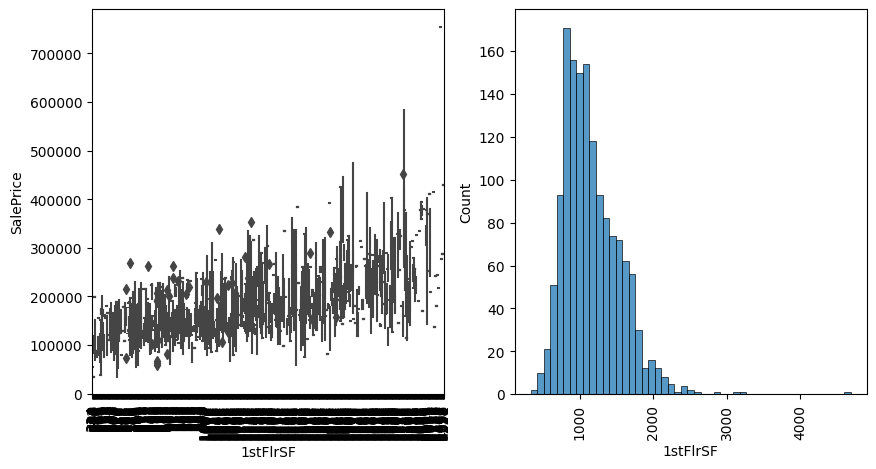

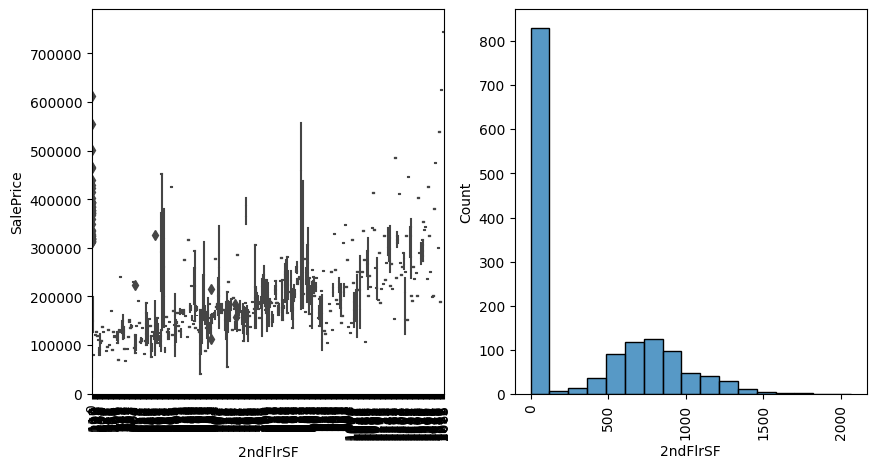

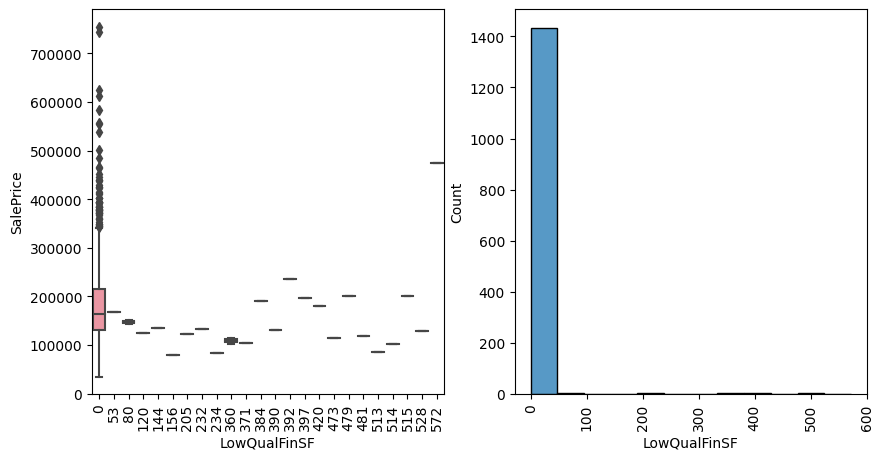

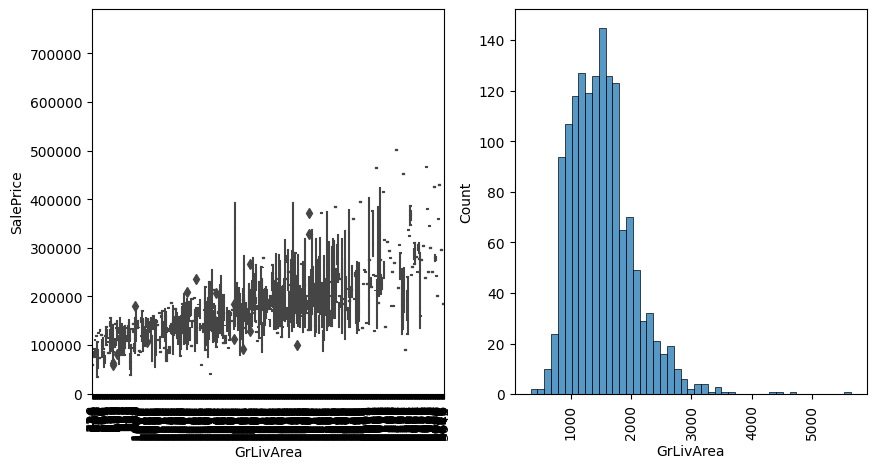

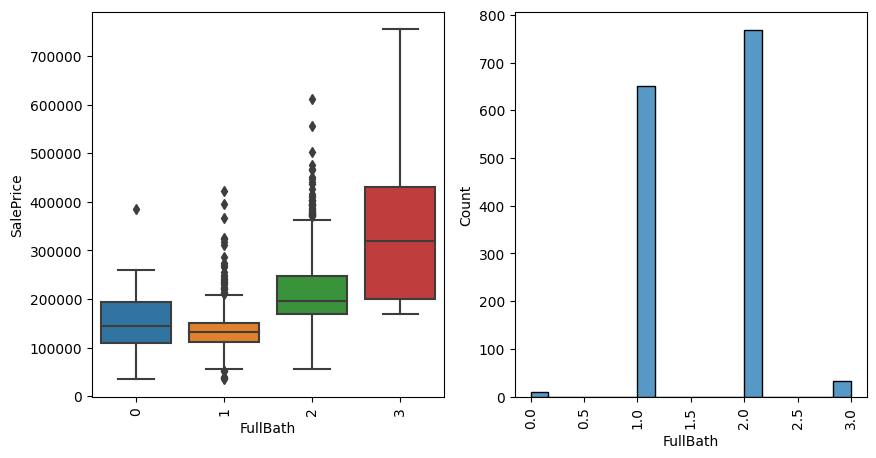

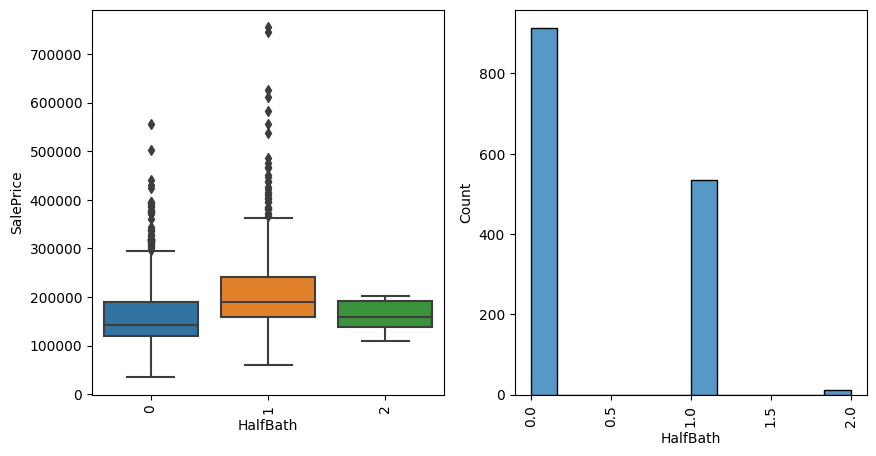

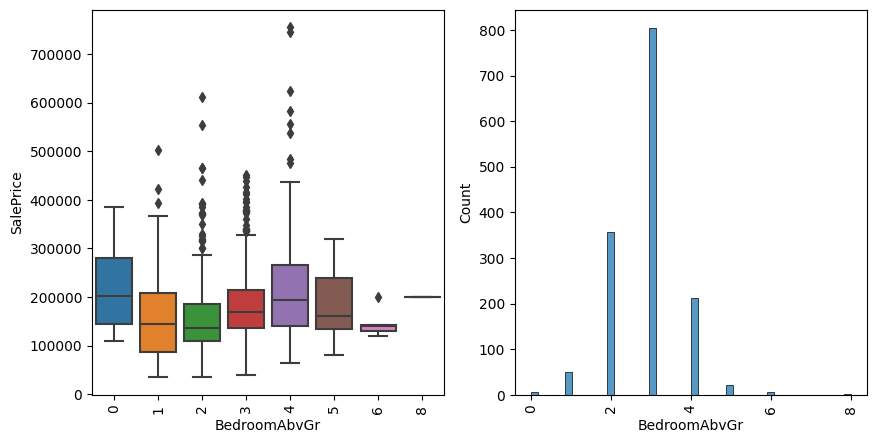

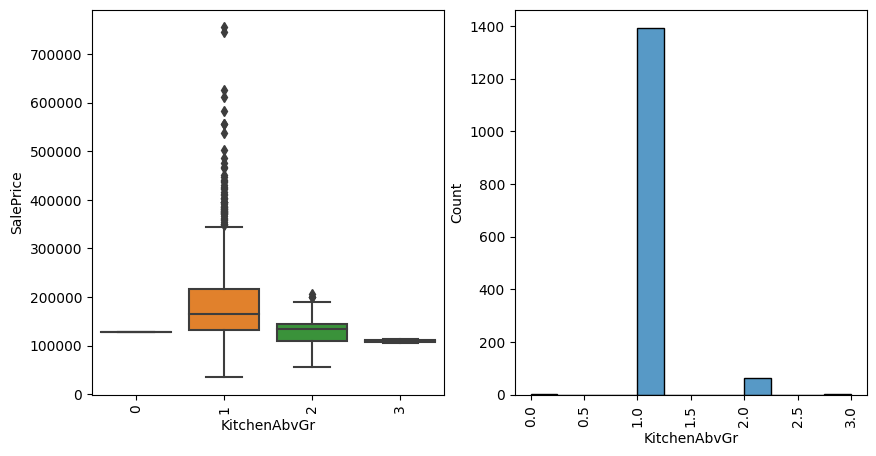

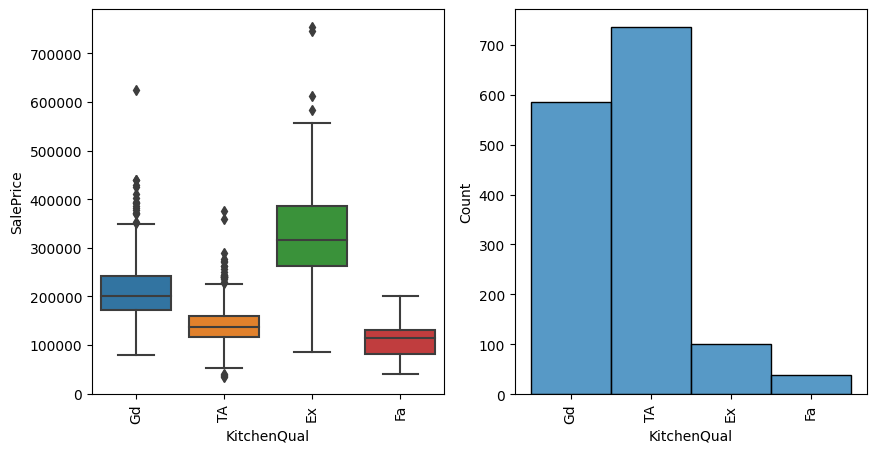

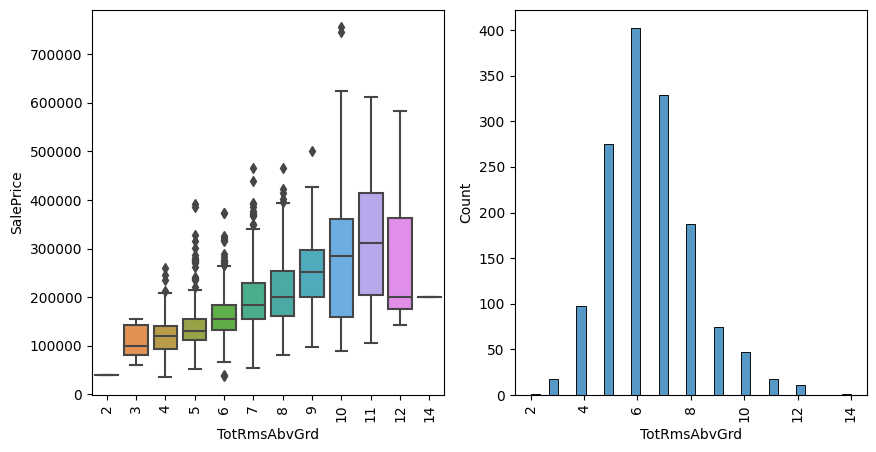

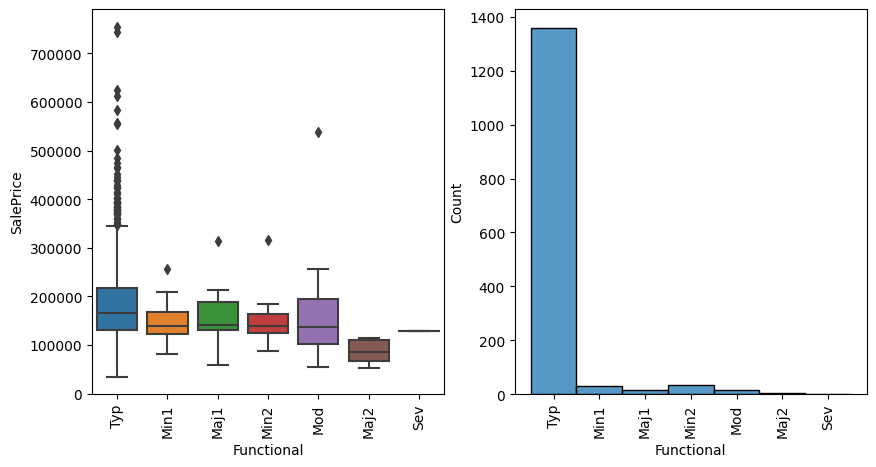

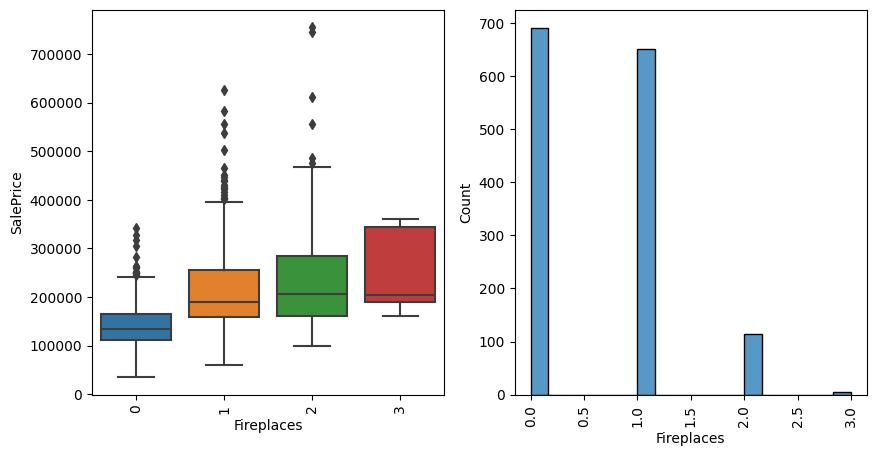

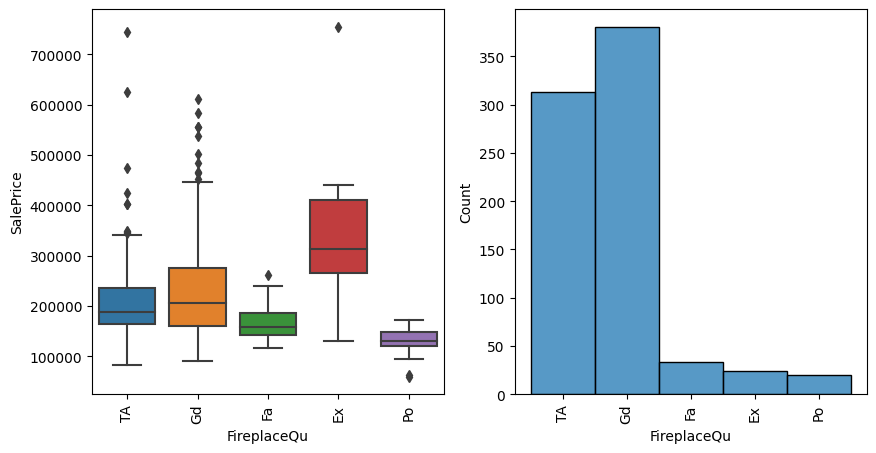

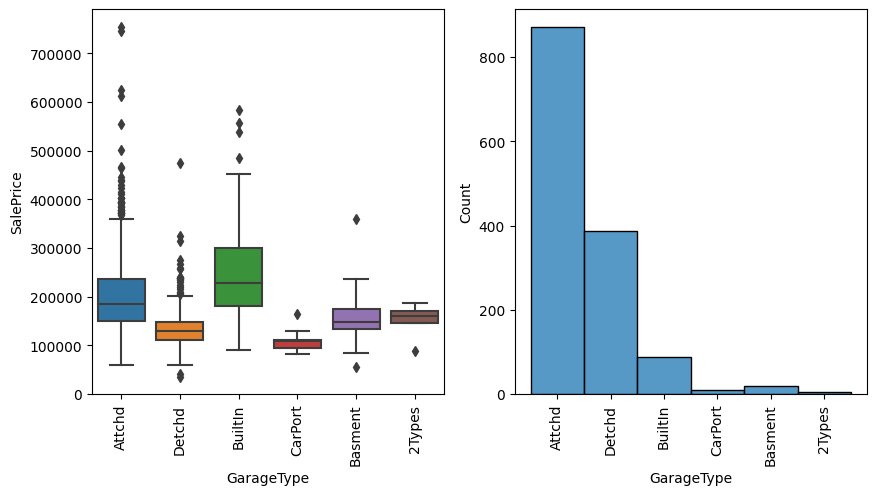

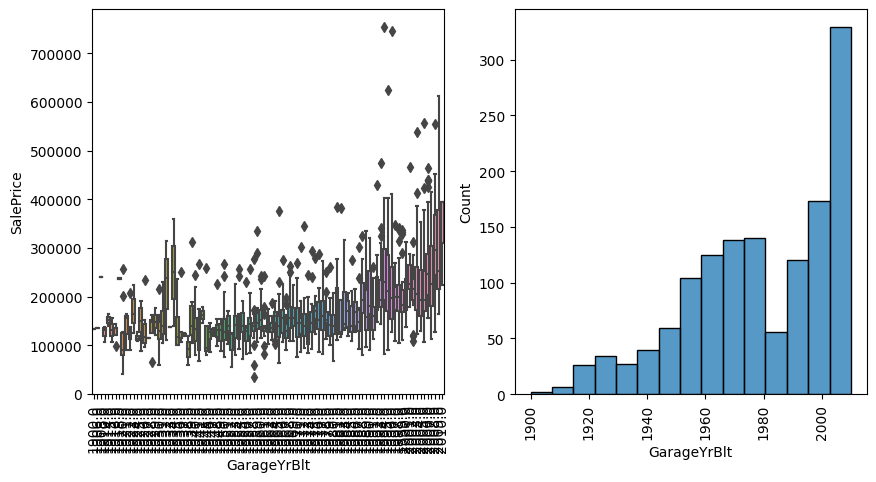

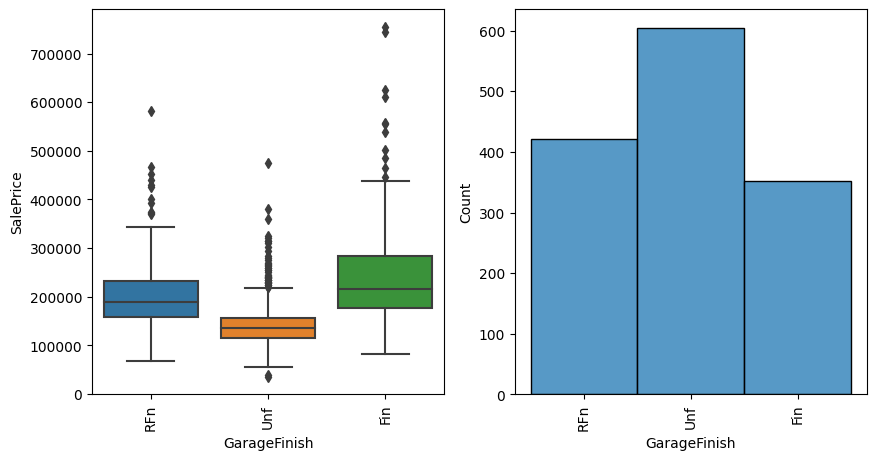

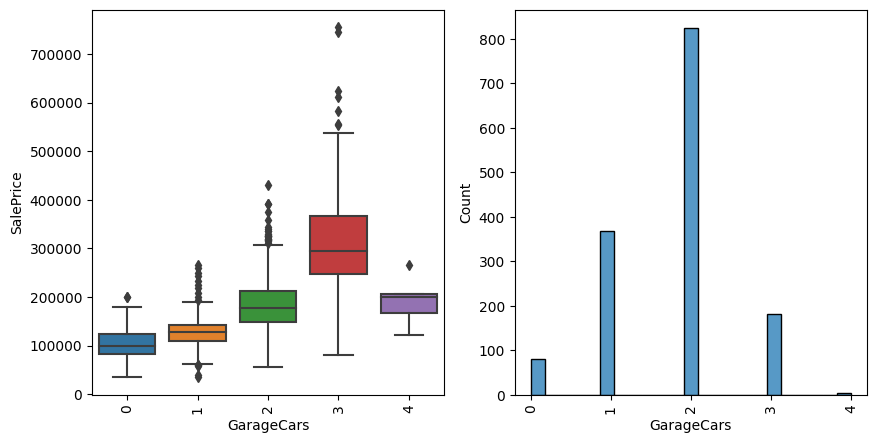

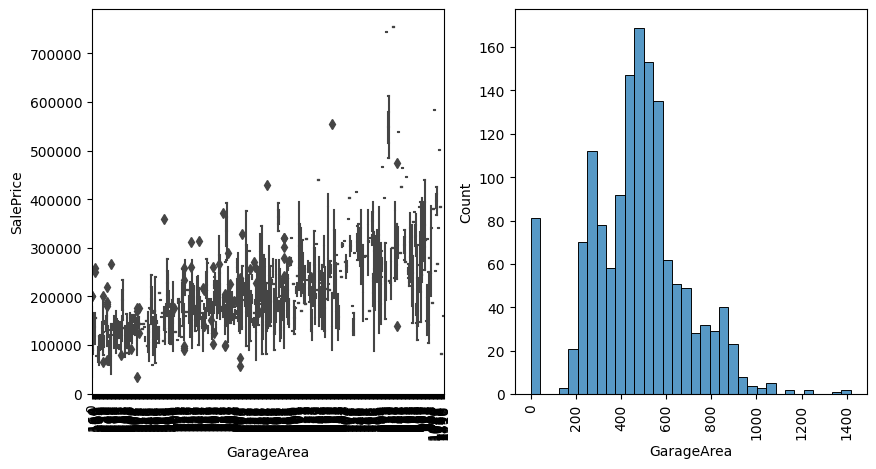

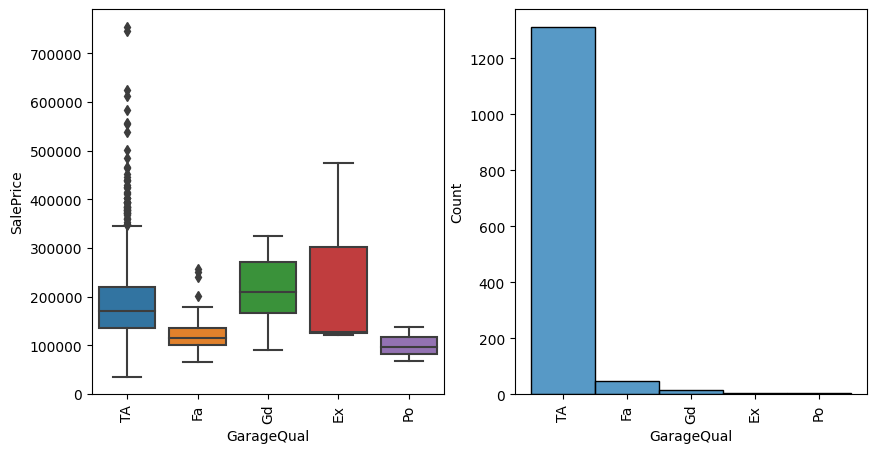

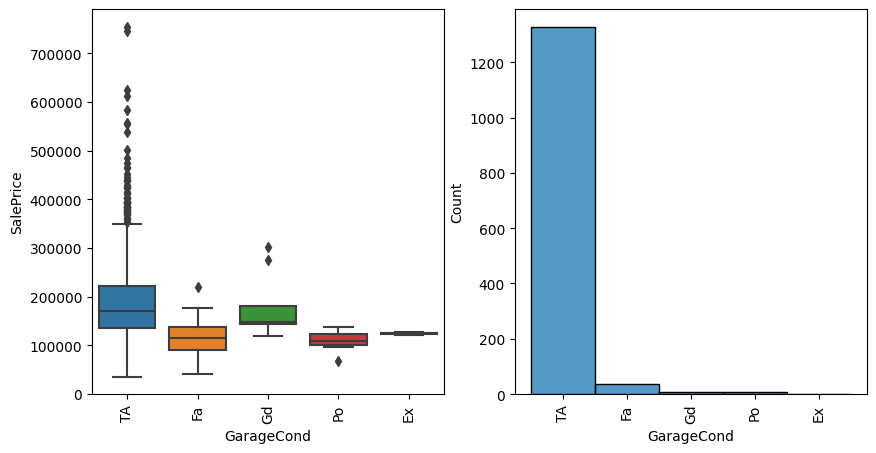

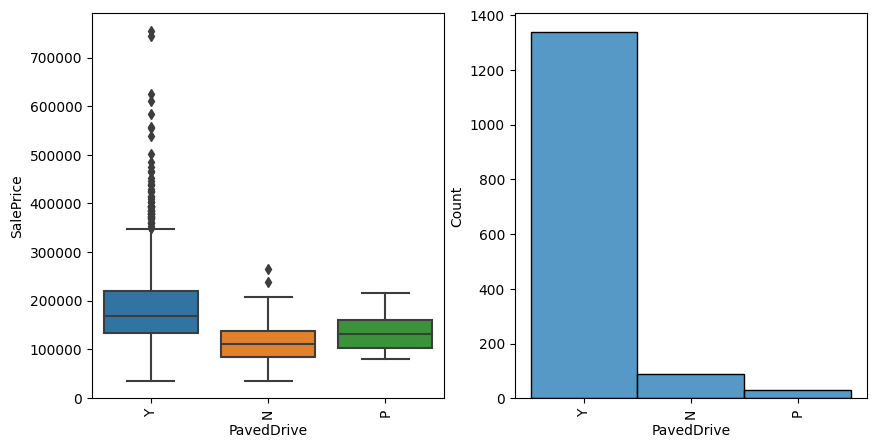

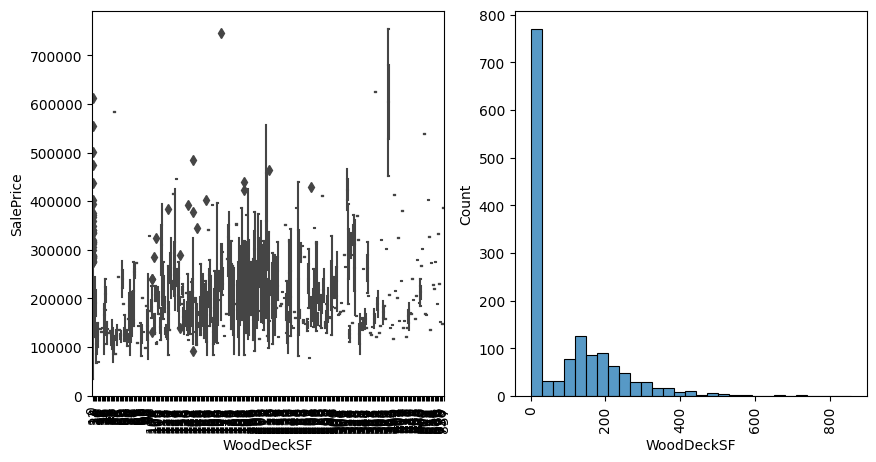

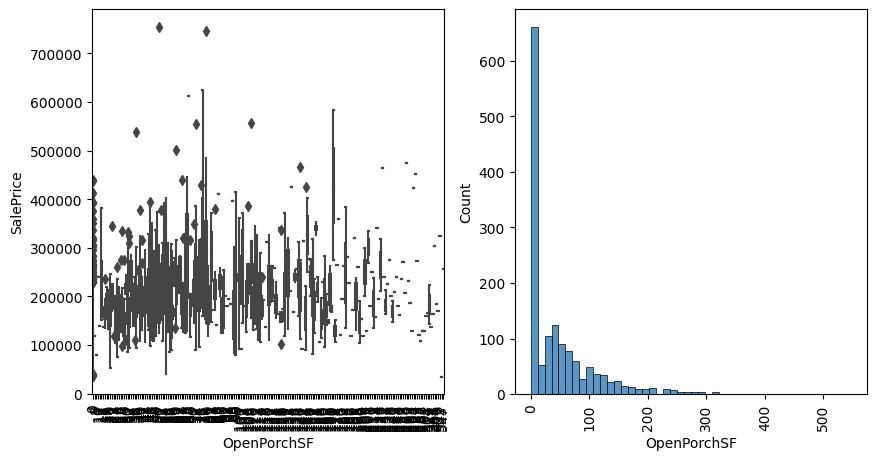

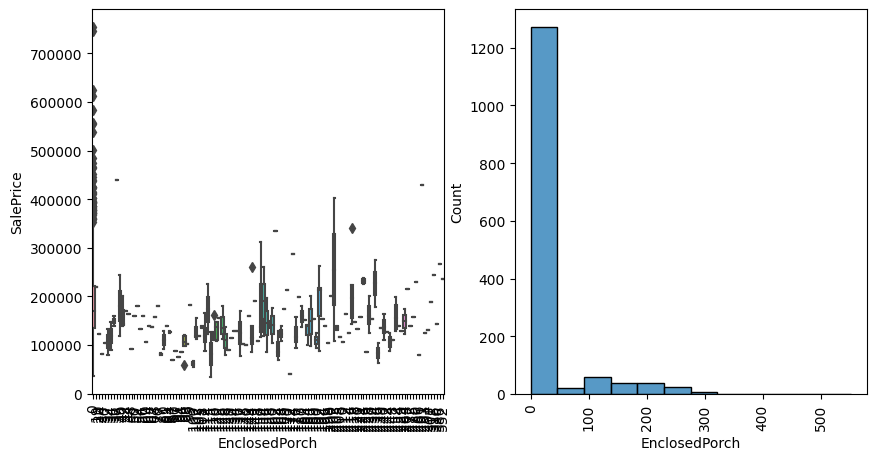

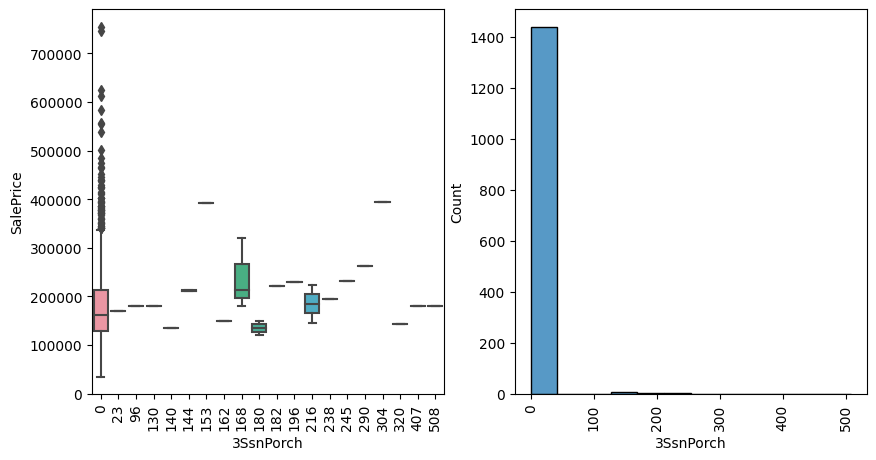

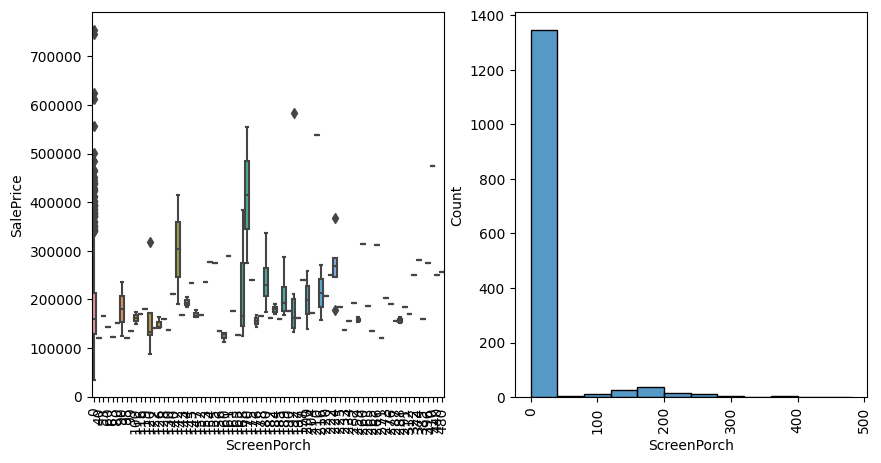

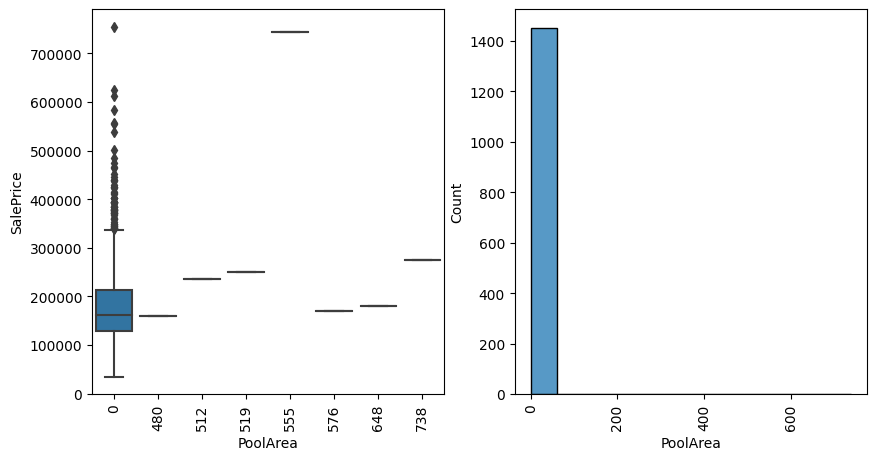

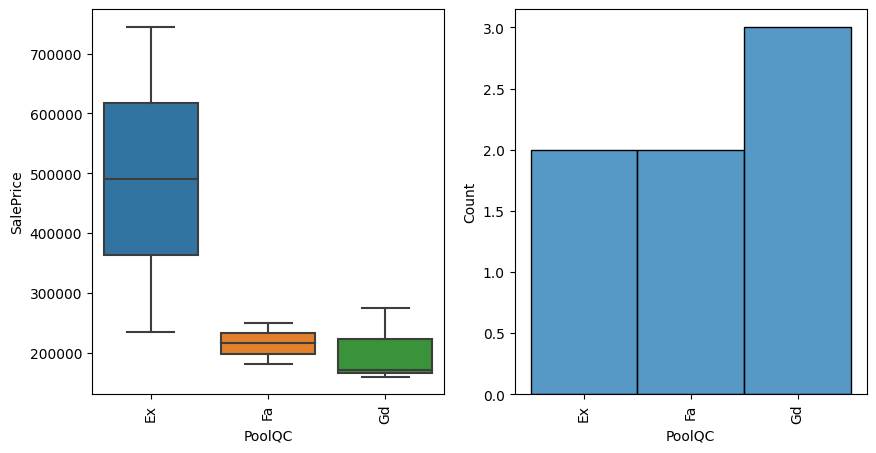

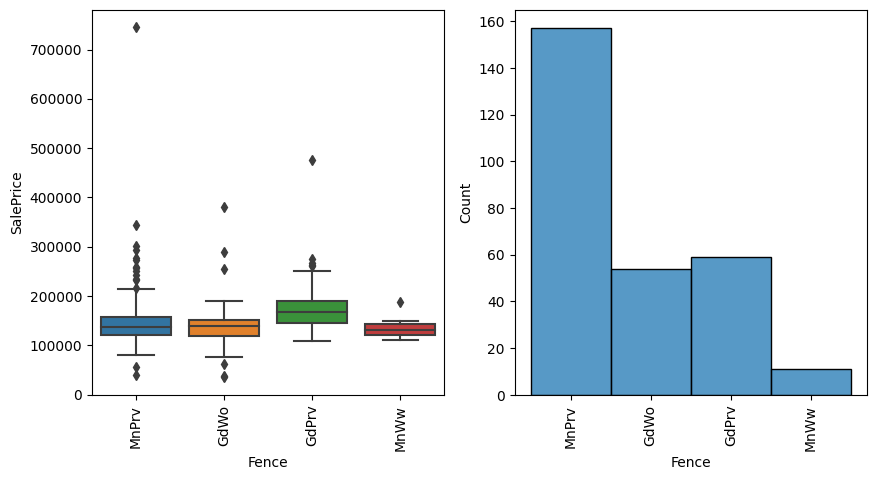

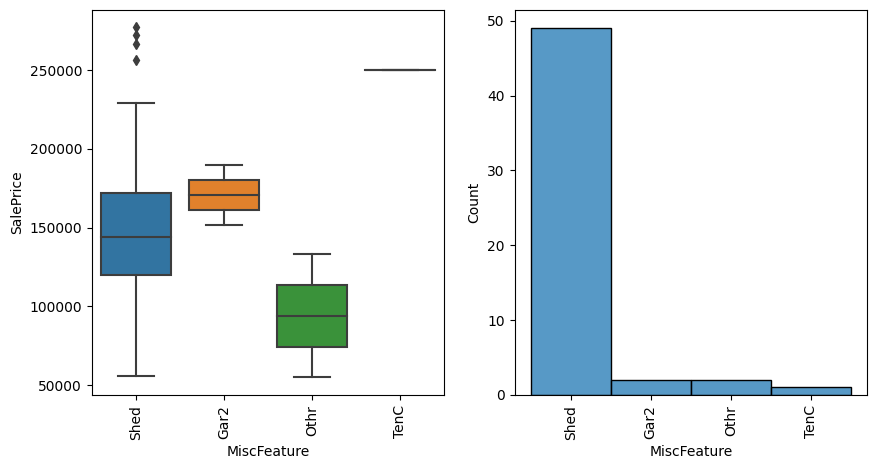

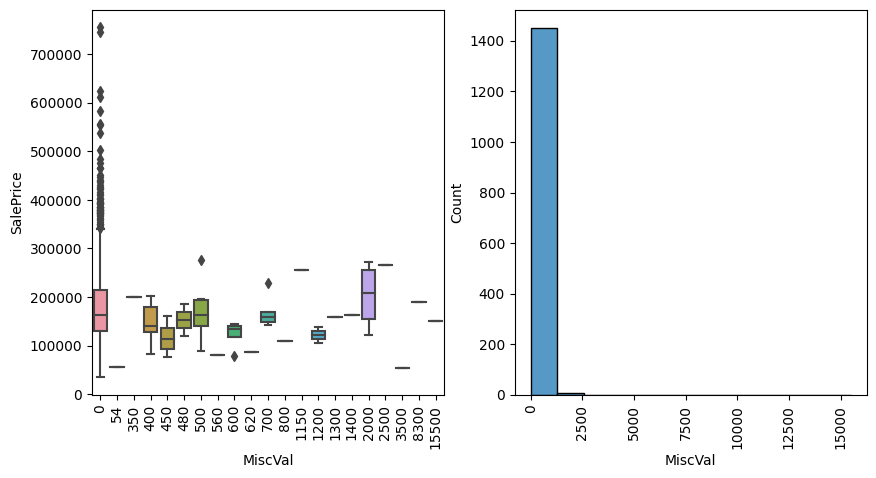

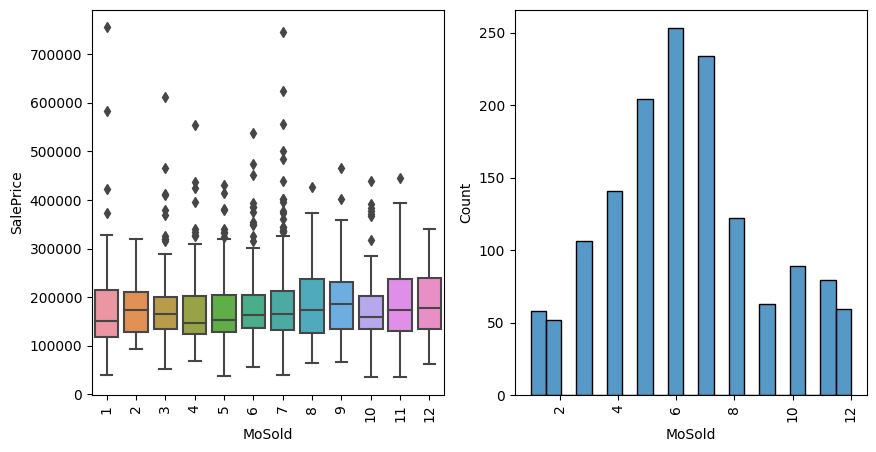

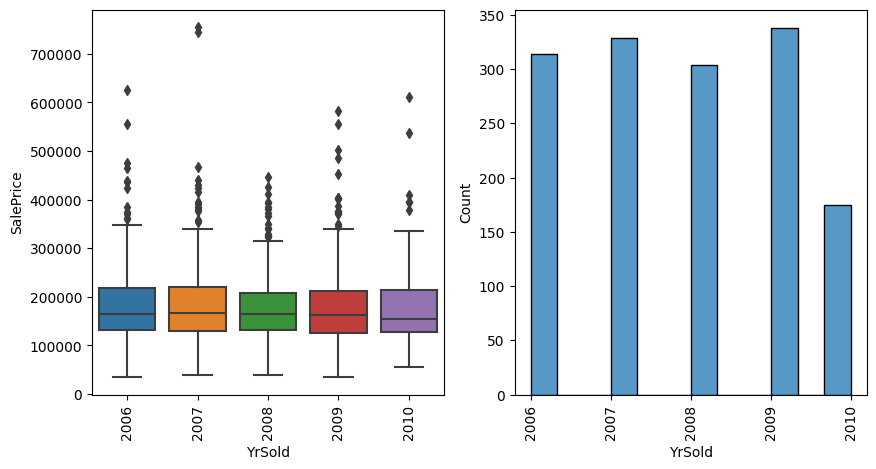

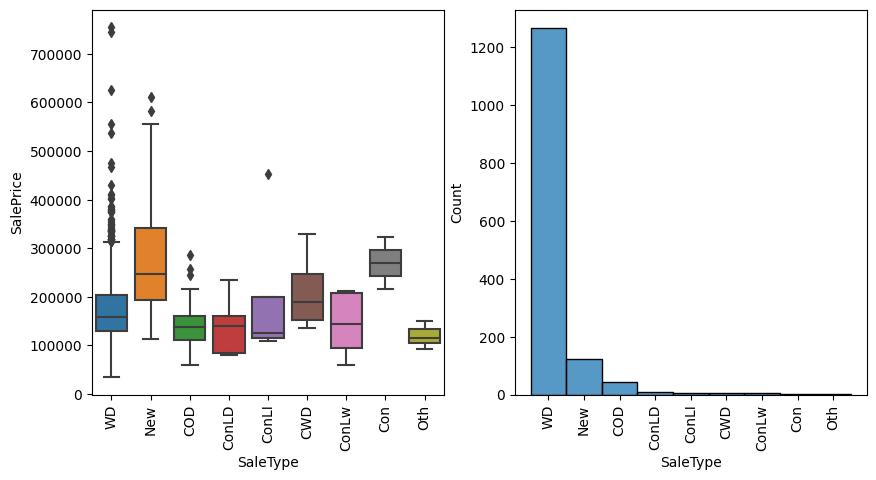

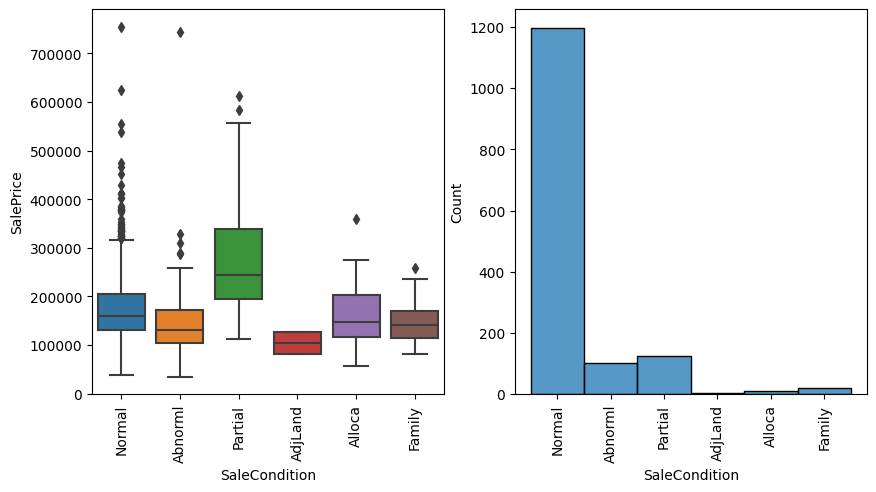

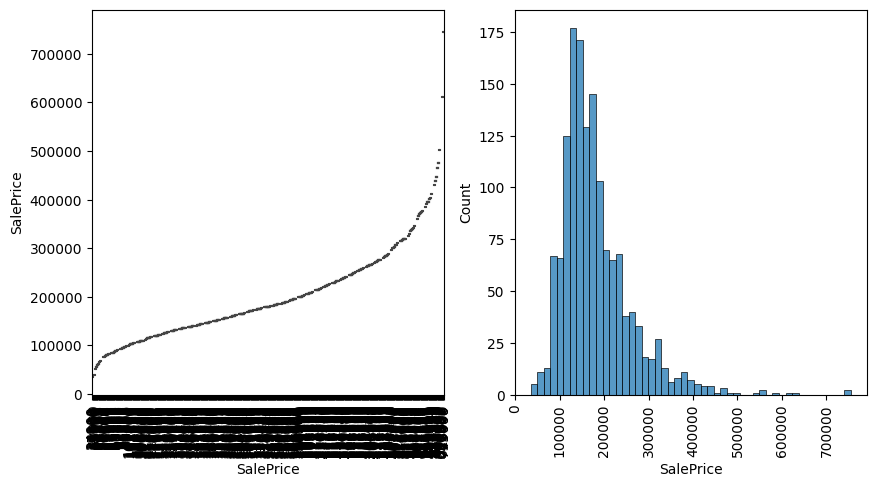

In [10]:
for col in df_combined:
    if col not in basement_cols:
        plt.figure(figsize=(10, 5))
        plt.subplot(1,2,1)
        sns.boxplot(x=train[col], y=train['SalePrice'])
        plt.xticks(rotation=90)
        plt.subplot(1,2,2)
        sns.histplot(x=train[col])
        plt.xticks(rotation=90)

<Axes: >

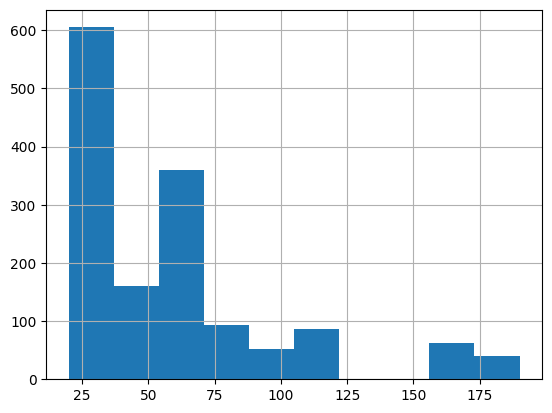

In [11]:
train['MSSubClass'].hist()

<Axes: >

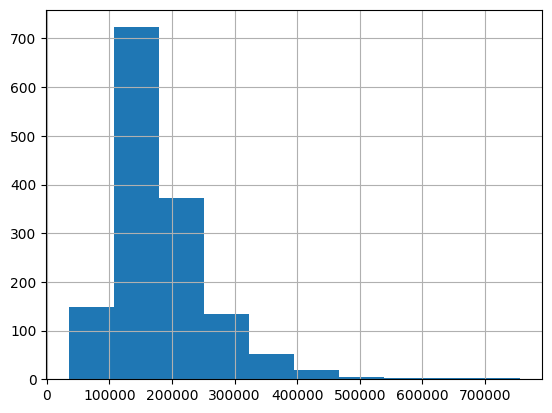

In [12]:
train['SalePrice'].hist()

<Axes: >

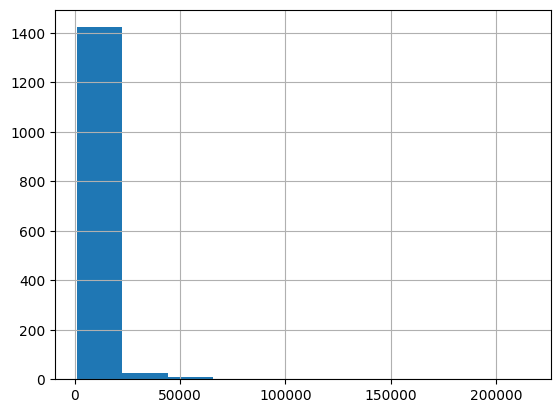

In [13]:
train['LotArea'].hist()

<Axes: >

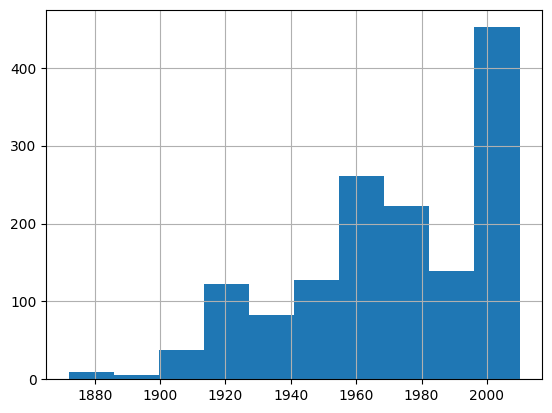

In [14]:
train['YearBuilt'].hist()

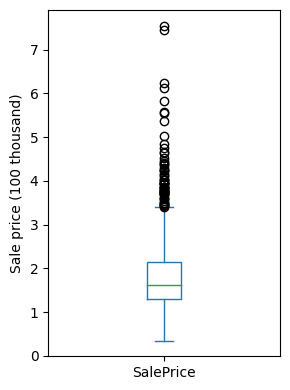

In [15]:
teste = (train['SalePrice']/100000).plot.box(figsize=(3, 4))
teste.set_ylabel('Sale price (100 thousand)')
plt.tight_layout()
plt.show()

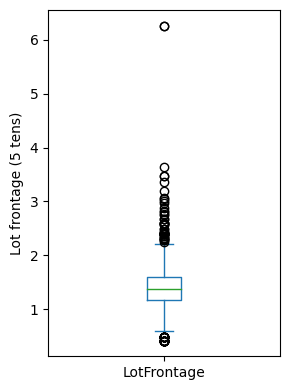

In [16]:
teste = (train['LotFrontage']/50).plot.box(figsize=(3, 4))
teste.set_ylabel('Lot frontage (5 tens)')
plt.tight_layout()
plt.show()

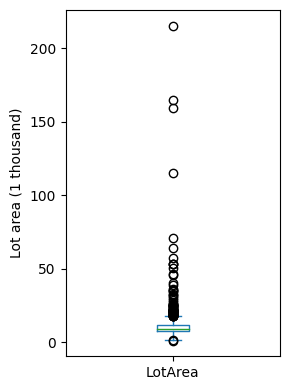

In [17]:
teste = (train['LotArea']/1000).plot.box(figsize=(3, 4))
teste.set_ylabel('Lot area (1 thousand)')
plt.tight_layout()
plt.show()

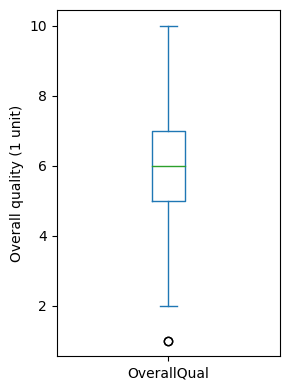

In [18]:
teste = (train['OverallQual']).plot.box(figsize=(3, 4))
teste.set_ylabel('Overall quality (1 unit)')
plt.tight_layout()
plt.show()

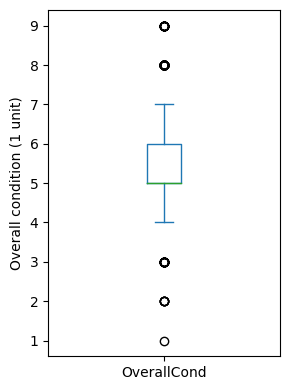

In [19]:
teste = (train['OverallCond']).plot.box(figsize=(3, 4))
teste.set_ylabel('Overall condition (1 unit)')
plt.tight_layout()
plt.show()

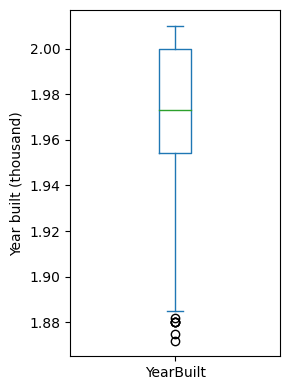

In [20]:
teste = (train['YearBuilt']/1000).plot.box(figsize=(3, 4))
teste.set_ylabel('Year built (thousand)')
plt.tight_layout()
plt.show()

In [10]:
#drop das colunas Alley, PoolQc, MiscFeature, Fence
train = train.drop(columns=['Alley', 'Fence', 'PoolQC', 'MiscFeature'])
train

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
2       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
3       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
4       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1455    AllPub    Inside       Gtl      Gilbert       Norm       Norm   
1456    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1457    AllPub    Inside       Gtl      Crawfor       Norm       Norm   
1458    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1459    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0        1Fam     2Story            7            5       2003          2003   
1        1Fam     1Story            6            8       1976          1976   
2        1Fam     2Story            7            5       2001          2002   
3        1Fam     2Story            7            5       1915          1970   
4        1Fam     2Story            8            5       2000          2000   
...       ...        ...          ...          ...        ...           ...   
1455     1Fam     2Story            6            5       1999          2000   
1456     1Fam     1Story            6            6       1978          1988   
1457     1Fam     2Story            7            9       1941          2006   
1458     1Fam     1Story            5            6       1950          1996   
1459     1Fam     1Story            5            6       1965          1965   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0        Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
1        Gable  CompShg     MetalSd     MetalSd       None         0.0   
2        Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
3        Gable  CompShg     Wd Sdng     Wd Shng       None         0.0   
4        Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   
...        ...      ...         ...         ...        ...         ...   
1455     Gable  CompShg     VinylSd     VinylSd       None         0.0   
1456     Gable  CompShg     Plywood     Plywood      Stone       119.0   
1457     Gable  CompShg     CemntBd     CmentBd       None         0.0   
1458       Hip  CompShg     MetalSd     MetalSd       None         0.0   
1459     Gable  CompShg     HdBoard     HdBoard       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           Gd        TA      PConc       Gd       TA           No   
1           TA        TA     CBlock       Gd       TA           Gd   
2           Gd        TA      PConc       Gd       TA           Mn   
3           TA        TA     BrkTil       TA       Gd         

In [11]:
encoder = LabelEncoder()

aux = train.select_dtypes(exclude = [int, float]).columns.tolist()
aux.append("MSSubClass")

for coluna in aux:
    train[coluna] = encoder.fit_transform(train[coluna])
    
train

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0              5         3         65.0     8450       1         3   
1              0         3         80.0     9600       1         3   
2              5         3         68.0    11250       1         0   
3              6         3         60.0     9550       1         0   
4              5         3         84.0    14260       1         0   
...          ...       ...          ...      ...     ...       ...   
1455           5         3         62.0     7917       1         3   
1456           0         3         85.0    13175       1         3   
1457           6         3         66.0     9042       1         3   
1458           0         3         68.0     9717       1         3   
1459           0         3         75.0     9937       1         3   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0               3          0          4          0             5           2   
1               3          0          2          0            24           1   
2               3          0          4          0             5           2   
3               3          0          0          0             6           2   
4               3          0          2          0            15           2   
...           ...        ...        ...        ...           ...         ...   
1455            3          0          4          0             8           2   
1456            3          0          4          0            14           2   
1457            3          0          4          0             6           2   
1458            3          0          4          0            12           2   
1459            3          0          4          0             7           2   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0              2         0           5            7            5       2003   
1              2         0           2            6            8       1976   
2              2         0           5            7            5       2001   
3              2         0           5            7            5       1915   
4              2         0           5            8            5       2000   
...          ...       ...         ...          ...          ...        ...   
1455           2         0           5            6            5       1999   
1456           2         0           2            6            6       1978   
1457           2         0           5            7            9       1941   
1458           2         0           2            5            6       1950   
1459           2         0           2            5            6       1965   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             2003          1         1           12           13           1   
1             1976          1         1            8            8           2   
2             2002          1         1           12           13           1   
3             1970          1         1           13           15           2   
4             2000          1         1           12           13           1   
...            ...        ...       ...          ...          ...         ...   
1455          2000          1         1           12           13           2   
1456          1988          1         1            9           10           3   
1457          2006          1         1            5            5           2   
1458          1996          3         1            8            8           2   
1459          1965          1         1            6            6           2   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0          196.0          2          4           2         2         3   
1            0.0          3          4           1         2         3   
2          162.0          2          4           2         2

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [13]:
train.describe()

MSSubClass     MSZoning  LotFrontage        LotArea       Street  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean      4.166438     3.028767    70.049958   10516.828082     0.995890   
std       4.161951     0.632017    24.284752    9981.264932     0.063996   
min       0.000000     0.000000    21.000000    1300.000000     0.000000   
25%       0.000000     3.000000    59.000000    7553.500000     1.000000   
50%       4.000000     3.000000    69.000000    9478.500000     1.000000   
75%       6.000000     3.000000    80.000000   11601.500000     1.000000   
max      14.000000     4.000000   313.000000  215245.000000     1.000000   

          LotShape  LandContour    Utilities    LotConfig    LandSlope  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      1.942466     2.777397     0.000685     3.019178     0.062329   
std       1.409156     0.707666     0.026171     1.622634     0.276232   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     3.000000     0.000000     2.000000     0.000000   
50%       3.000000     3.000000     0.000000     4.000000     0.000000   
75%       3.000000     3.000000     0.000000     4.000000     0.000000   
max       3.000000     3.000000     1.000000     4.000000     2.000000   

       Neighborhood   Condition1   Condition2     BldgType   HouseStyle  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      12.251370     2.031507     2.008219     0.493151     3.038356   
std        6.013735     0.868515     0.259040     1.198277     1.911305   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        7.000000     2.000000     2.000000     0.000000     2.000000   
50%       12.000000     2.000000     2.000000     0.000000     2.000000   
75%       17.000000     2.000000     2.000000     0.000000     5.000000   
max       24.000000     8.000000     7.000000     4.000000     7.000000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd    RoofStyle  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean      6.099315     5.575342  1971.267808   1984.865753     1.410274   
std       1.382997     1.112799    30.202904     20.645407     0.834998   
min       1.000000     1.000000  1872.000000   1950.000000     0.000000   
25%       5.000000     5.000000  1954.000000   1967.000000     1.000000   
50%       6.000000     5.000000  1973.000000   1994.000000     1.000000   
75%       7.000000     6.000000  2000.000000   2004.000000     1.000000   
max      10.000000     9.000000  2010.000000   2010.000000     5.000000   

          RoofMatl  Exterior1st  Exterior2nd   MasVnrType   MasVnrArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1452.000000   
mean      1.075342     9.624658    10.339726     1.773288   103.685262   
std       0.599127     3.197659     3.540570     0.635891   181.066207   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     8.000000     8.000000     1.000000     0.000000   
50%       1.000000    12.000000    13.000000     2.000000     0.000000   
75%       1.000000    12.000000    13.000000     2.000000   166.000000   
max       7.000000    14.000000    15.000000     4.000000  1600.000000   

         ExterQual    ExterCond   Foundation     BsmtQual     BsmtCond  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      2.539726     3.733562     1.396575     2.305479     2.842466   
std       0.693995     0.731807     0.722394     0.899225     0.676527   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     4.000000     1.000000     2.000000     3.000000   
50%       3.000000     4.000000     1.000000     2.000000     3.000000   
75%       3.000000     4.000000     2.000000     3.000000     3.000000   
max       3.000000     4.000000     5.000000 

In [14]:
train.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.037785    -0.337937 -0.132505 -0.025737   
MSZoning         0.037785  1.000000    -0.111690 -0.034452  0.087654   
LotFrontage     -0.337937 -0.111690     1.000000  0.426095 -0.040886   
LotArea         -0.132505 -0.034452     0.426095  1.000000 -0.197131   
Street          -0.025737  0.087654    -0.040886 -0.197131  1.000000   
LotShape         0.090920  0.061887    -0.169641 -0.165315 -0.010224   
LandContour     -0.007658 -0.017854    -0.080757 -0.149083  0.115995   
Utilities       -0.026217 -0.001192          NaN  0.010123  0.001682   
LotConfig        0.060625 -0.009895    -0.208276 -0.121161  0.013960   
LandSlope       -0.029300 -0.022055     0.088345  0.436868 -0.179360   
Neighborhood    -0.008765 -0.249679     0.093003  0.044569 -0.011561   
Condition1      -0.023826 -0.027874    -0.009254  0.023846 -0.071657   
Condition2      -0.026699  0.044606     0.003722  0.022164  0.002039   
BldgType         0.712474  0.005690    -0.448537 -0.205721 -0.018243   
HouseStyle       0.446294 -0.105315     0.035502 -0.033190  0.023704   
OverallQual      0.056546 -0.160099     0.251646  0.105806  0.058823   
OverallCond     -0.060795  0.186951    -0.059213 -0.005636  0.042848   
YearBuilt        0.033544 -0.308908     0.123349  0.014228  0.021137   
YearRemodAdd     0.039944 -0.174728     0.088866  0.013788  0.065465   
RoofStyle       -0.131687 -0.000301     0.169799  0.077054 -0.019732   
RoofMatl        -0.021525  0.005133     0.095785  0.149837  0.008081   
Exterior1st     -0.081155 -0.008558     0.081271  0.004256  0.002505   
Exterior2nd     -0.121192  0.006963     0.107308 -0.003930  0.006166   
MasVnrType      -0.050218 -0.048567    -0.019173 -0.004851  0.010775   
MasVnrArea       0.030851 -0.067487     0.193458  0.104160  0.017326   
ExterQual       -0.019969  0.200536    -0.197128 -0.057275  0.049976   
ExterCond        0.007819 -0.096041     0.052944  0.015160  0.005874   
Foundation       0.072182 -0.235174     0.106156 -0.011081  0.035277   
BsmtQual        -0.035938  0.125629    -0.176305 -0.066085 -0.025811   
BsmtCond        -0.004557 -0.007027     0.045514  0.007312 -0.014963   
BsmtExposure    -0.084258  0.038115    -0.138181 -0.140209  0.072232   
BsmtFinType1     0.041024  0.025322    -0.029833 -0.062319 -0.012054   
BsmtFinSF1      -0.073706 -0.049128     0.233633  0.214103 -0.015643   
BsmtFinType2     0.049706 -0.028815    -0.034501 -0.070658  0.061663   
BsmtFinSF2      -0.072990  0.028086     0.049900  0.111170 -0.038487   
BsmtUnfSF       -0.137092 -0.046749     0.132644 -0.002618  0.035229   
TotalBsmtSF     -0.241548 -0.087834     0.392075  0.260833  0.005068   
Heating          0.062597  0.056866    -0.022782  0.028158  0.007904   
HeatingQC        0.021791  0.134279    -0.088687  0.004212 -0.053995   
CentralAir      -0.096907 -0.049523     0.071659  0.049755  0.069869   
Electrical       0.057313 -0.070812     0.065063  0.043783  0.021355   
1stFlrSF        -0.233980 -0.055614     0.457181  0.299475  0.005950   
2ndFlrSF         0.359167 -0.051481     0.080177  0.050986  0.046983   
LowQualFinSF     0.051697  0.011520     0.038469  0.004779  0.007724   
GrLivArea        0.131017 -0.082615     0.402797  0.263116  0.044121   
BsmtFullBath     0.001790 -0.018526     0.100949  0.158155 -0.050524   
BsmtHalfBath     0.013119  0.007193    -0.007234  0.048046  0.015485   
FullBath         0.166707 -0.198290     0.198769  0.126031  0.046471   
HalfBath         0.208262 -0.133876     0.053532  0.014259  0.027628   
BedroomAbvGr     0.026335 -0.016471     0.263170  0.119690  0.028865   
KitchenAbvGr     0.323390  0.049434    -0.006069 -0.017784  0.013583   
KitchenQual      0.008222  0.128976    -0.200636 -0.057018 -0.025307   
TotRmsAbvGrd     0.107517 -0.043200     0.352096  0.190015  0.046828   
Functional       0.020999 -0.095722     0.033071 -0.022317 -0.016444   
Fireplaces      -0.019405 -0.011349     0.266639  0.271

Text(0.5, 1.5, 'disperção entre as varaveis')

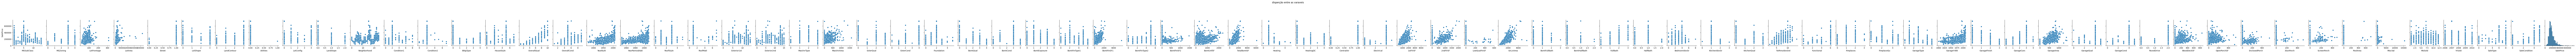

In [26]:
ax = sns.pairplot(train, y_vars="SalePrice", x_vars=train.select_dtypes(include= [int, float,object]))
ax.fig.suptitle("disperção entre as varaveis",y=1.5)

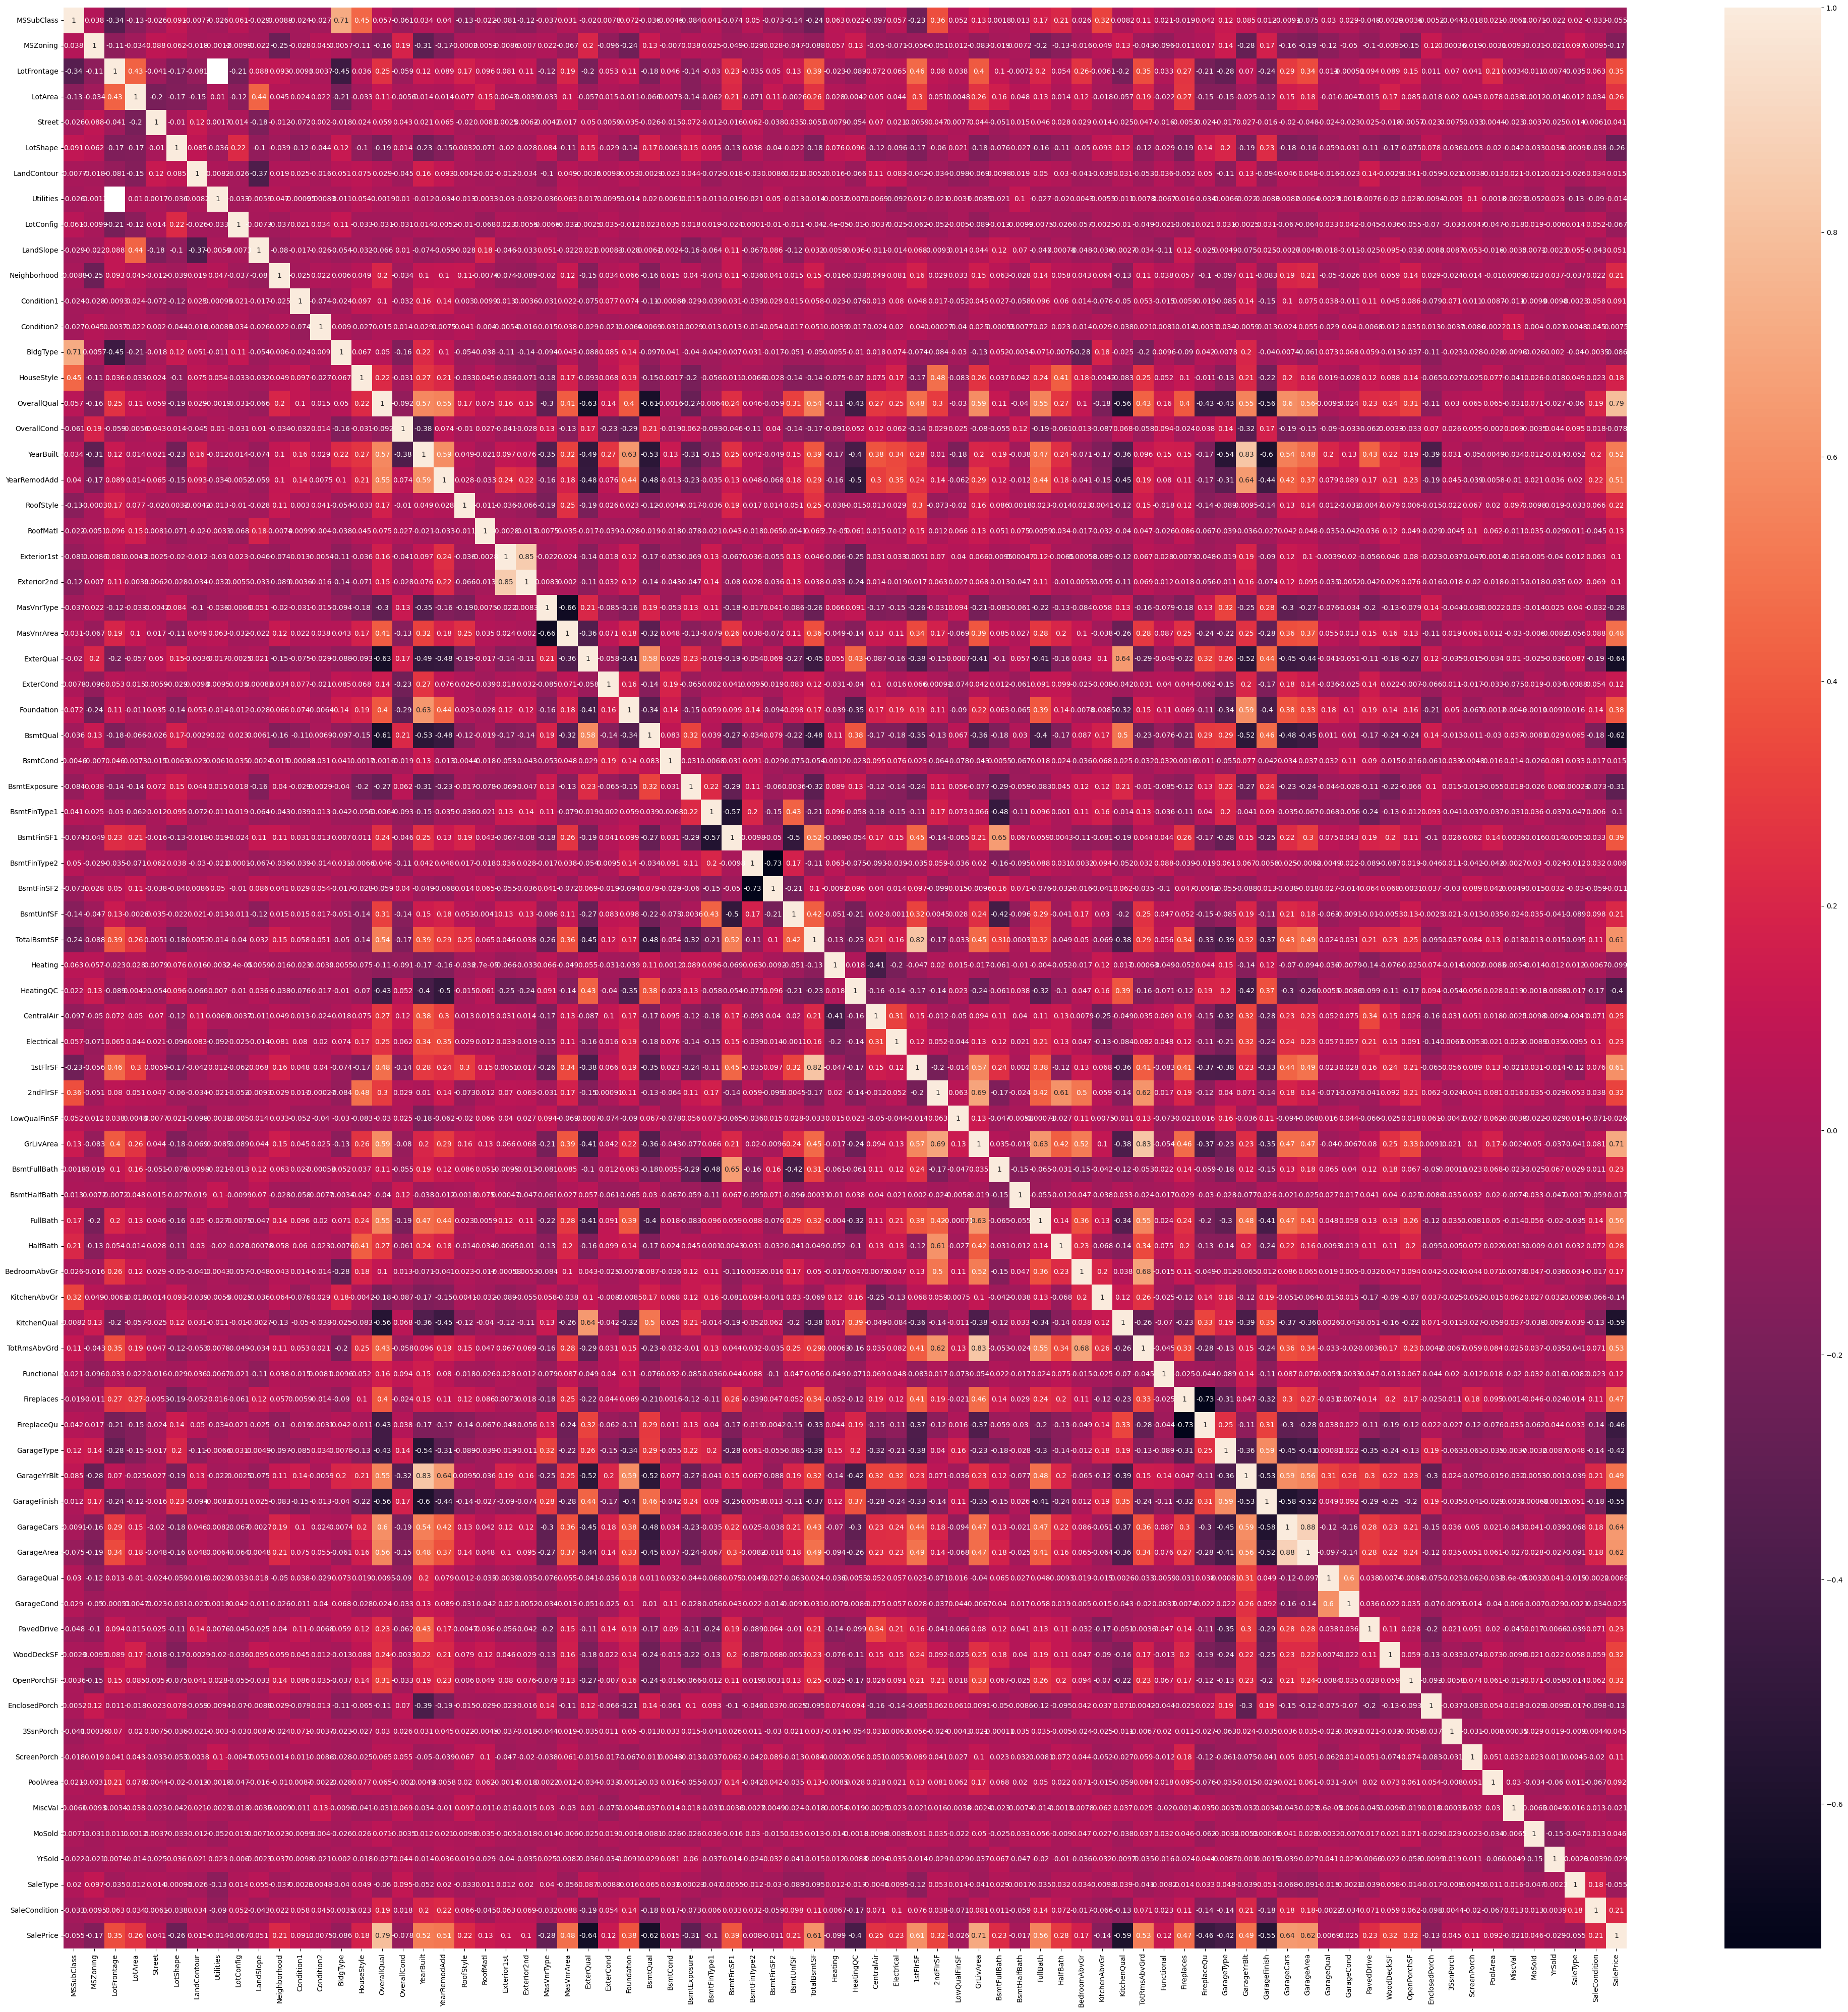

In [27]:
# Visualize a correlação entre as características (features) e a variável alvo.
ax = plt.subplots(figsize=(50,50)) 
ax = sns.heatmap(train.corr(), annot=True) # ESCOLER AS PRINCIPAIS COLUNAS PARA VERIFICAR AS CORRELAÇOES 

Distribuição da variável alvo, SalePrice, usando a função histplot. Essa visualização ajuda a entender a forma, tendência central e dispersão da variável alvo. 
Ela pode fornecer "insights" sobre se a distribuição é simétrica ou assimétrica, e se existem "outliers" ou "clusters "distintos nos dados.


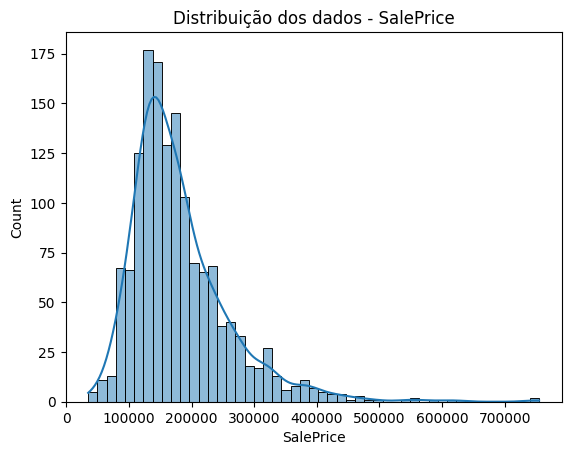

In [15]:
#Visualize a distribuição da variável alvo.
z = sns.histplot(data=train,  x='SalePrice', kde=True)
z.set_xlabel("SalePrice") 
z.set_ylabel("Count")
plt.title("Distribuição dos dados - SalePrice")
plt.show()

In [16]:
train.isnull().sum().sort_values(kind='mergesort',ascending = False).head(77)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
MSSubClass         0
MSZoning           0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [17]:
#preencher os valores nulos da coluna com a media de todos os valores da coluna 
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace = True)
train

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0              5         3         65.0     8450       1         3   
1              0         3         80.0     9600       1         3   
2              5         3         68.0    11250       1         0   
3              6         3         60.0     9550       1         0   
4              5         3         84.0    14260       1         0   
...          ...       ...          ...      ...     ...       ...   
1455           5         3         62.0     7917       1         3   
1456           0         3         85.0    13175       1         3   
1457           6         3         66.0     9042       1         3   
1458           0         3         68.0     9717       1         3   
1459           0         3         75.0     9937       1         3   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0               3          0          4          0             5           2   
1               3          0          2          0            24           1   
2               3          0          4          0             5           2   
3               3          0          0          0             6           2   
4               3          0          2          0            15           2   
...           ...        ...        ...        ...           ...         ...   
1455            3          0          4          0             8           2   
1456            3          0          4          0            14           2   
1457            3          0          4          0             6           2   
1458            3          0          4          0            12           2   
1459            3          0          4          0             7           2   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0              2         0           5            7            5       2003   
1              2         0           2            6            8       1976   
2              2         0           5            7            5       2001   
3              2         0           5            7            5       1915   
4              2         0           5            8            5       2000   
...          ...       ...         ...          ...          ...        ...   
1455           2         0           5            6            5       1999   
1456           2         0           2            6            6       1978   
1457           2         0           5            7            9       1941   
1458           2         0           2            5            6       1950   
1459           2         0           2            5            6       1965   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             2003          1         1           12           13           1   
1             1976          1         1            8            8           2   
2             2002          1         1           12           13           1   
3             1970          1         1           13           15           2   
4             2000          1         1           12           13           1   
...            ...        ...       ...          ...          ...         ...   
1455          2000          1         1           12           13           2   
1456          1988          1         1            9           10           3   
1457          2006          1         1            5            5           2   
1458          1996          3         1            8            8           2   
1459          1965          1         1            6            6           2   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0          196.0          2          4           2         2         3   
1            0.0          3          4           1         2         3   
2          162.0          2          4           2         2

In [18]:
predictors = train.columns.tolist()
predictors.remove('SalePrice')
outcome = 'SalePrice'

house_price = LinearRegression()

house_price.fit(train[predictors], train[outcome])

print(f'Intercept: {house_price.intercept_:.3f}')
print('Coefficients:')

for name, coef in zip(predictors, house_price.coef_):
    print(f' {name}: {coef}')

Intercept: 1740391.367
Coefficients:
 MSSubClass: -1341.8007014340944
 MSZoning: -979.0465385049451
 LotFrontage: -130.97263806554892
 LotArea: 0.39667205613768886
 Street: 29479.306917884784
 LotShape: -1041.0046650211839
 LandContour: 3792.627314592369
 Utilities: -55902.81122670031
 LotConfig: -81.19367934543828
 LandSlope: 5885.001179197494
 Neighborhood: 361.77554443797317
 Condition1: -787.9936503425602
 Condition2: -9021.079378733239
 BldgType: -2365.4210720736687
 HouseStyle: -993.366832902373
 OverallQual: 11148.895555890374
 OverallCond: 4543.345113478584
 YearBuilt: 235.66463283033795
 YearRemodAdd: 29.380543165525097
 RoofStyle: 2085.5555119741744
 RoofMatl: 4667.8739339520835
 Exterior1st: -1008.1435447540119
 Exterior2nd: 379.99919953484454
 MasVnrType: 3892.292556208289
 MasVnrArea: 29.704098693970764
 ExterQual: -9249.724858268557
 ExterCond: 654.3336473113932
 Foundation: 1707.258137939027
 BsmtQual: -8406.004555358388
 BsmtCond: 2753.2598324106502
 BsmtExposure: -3774

In [19]:
fitted = house_price.predict(train[predictors])
RMSE = np.sqrt(mean_squared_error(train[outcome], fitted))
r2 = r2_score(train[outcome], fitted)
mae = mean_absolute_error(train[outcome], fitted)

def RSE(y_true, y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))
    rse = np.sqrt(RSS / (len(y_true) - 2))
    return rse

rse = RSE(train[outcome], fitted)

print(f'RMSE: {RMSE:.2f}')
print(f'R²: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'RSE: {rse:.4f}')

RMSE: 30753.20
R²: 0.8500
MAE: 18573.5953
RSE: 30774.2862


In [20]:
test = pd.read_csv("test.csv")
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd       None   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd       None   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [22]:
test = test.drop(columns=['Id', 'Alley', 'Fence', 'PoolQC', 'MiscFeature'])
aux = test.select_dtypes(exclude = [int, float]).columns.tolist()
aux.append("MSSubClass")

for coluna in aux:
    test[coluna] = encoder.fit_transform(test[coluna])

test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean(), inplace = True)
test['LotFrontage'].fillna(test['LotFrontage'].mean(), inplace = True)
test['MasVnrArea'].fillna(test['MasVnrArea'].mean(), inplace = True)

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   int32  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   int32  
 5   LotShape       1459 non-null   int32  
 6   LandContour    1459 non-null   int32  
 7   Utilities      1459 non-null   int32  
 8   LotConfig      1459 non-null   int32  
 9   LandSlope      1459 non-null   int32  
 10  Neighborhood   1459 non-null   int32  
 11  Condition1     1459 non-null   int32  
 12  Condition2     1459 non-null   int32  
 13  BldgType       1459 non-null   int32  
 14  HouseStyle     1459 non-null   int32  
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [24]:
temp = test.columns[test.isnull().any()].tolist()

for x in temp:
    test[x].fillna(test[x].mean(), inplace = True)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   int32  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   int32  
 5   LotShape       1459 non-null   int32  
 6   LandContour    1459 non-null   int32  
 7   Utilities      1459 non-null   int32  
 8   LotConfig      1459 non-null   int32  
 9   LandSlope      1459 non-null   int32  
 10  Neighborhood   1459 non-null   int32  
 11  Condition1     1459 non-null   int32  
 12  Condition2     1459 non-null   int32  
 13  BldgType       1459 non-null   int32  
 14  HouseStyle     1459 non-null   int32  
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [25]:
test_fitted = house_price.predict(test[predictors])
test['SalePrice'] = test_fitted
test

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0              0         2         80.0    11622       1         3   
1              0         3         81.0    14267       1         0   
2              5         3         74.0    13830       1         0   
3              5         3         78.0     9978       1         0   
4             11         3         43.0     5005       1         0   
...          ...       ...          ...      ...     ...       ...   
1454          13         4         21.0     1936       1         3   
1455          13         4         21.0     1894       1         3   
1456           0         3        160.0    20000       1         3   
1457           9         3         62.0    10441       1         3   
1458           5         3         74.0     9627       1         3   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0               3          0          4          0            12           1   
1               3          0          0          0            12           2   
2               3          0          4          0             8           2   
3               3          0          4          0             8           2   
4               1          0          4          0            22           2   
...           ...        ...        ...        ...           ...         ...   
1454            3          0          4          0            10           2   
1455            3          0          4          0            10           2   
1456            3          0          4          0            11           2   
1457            3          0          4          0            11           2   
1458            3          0          4          1            11           2   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0              2         0           2            5            6       1961   
1              2         0           2            6            6       1958   
2              2         0           4            5            5       1997   
3              2         0           4            6            6       1998   
4              2         4           2            8            5       1992   
...          ...       ...         ...          ...          ...        ...   
1454           2         3           4            4            7       1970   
1455           2         4           4            4            5       1970   
1456           2         0           2            5            7       1960   
1457           2         0           5            5            5       1992   
1458           2         0           4            7            5       1993   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             1961          1         0           10           12           2   
1             1958          3         0           11           13           1   
2             1998          1         0           10           12           2   
3             1998          1         0           10           12           1   
4             1992          1         0            6            6           2   
...            ...        ...       ...          ...          ...         ...   
1454          1970          1         0            5            5           2   
1455          1970          1         0            5            5           2   
1456          1996          1         0           10           12           2   
1457          1992          1         0            6           14           2   
1458          1994          1         0            6            6           1   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0            0.0          3          4           1         3         3   
1          108.0          3          4           1         3         3   
2            0.0          3          4           2         2

In [26]:
train.isna().sum().sort_values(ascending = False).head(len(train)) #retorna a quantidade de nulls

MSSubClass       0
HalfBath         0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
FullBath         0
MSZoning         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
CentralAir       0
HeatingQC        0
Heating          0
YearRemodAdd     0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape    

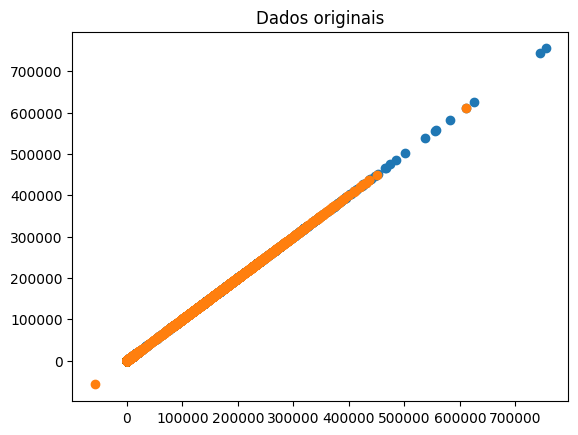

In [27]:
warnings.filterwarnings('ignore')


# plotando os dados originais 
plt.scatter(train.select_dtypes(include = [int, float]), train.select_dtypes(include = [int, float]))
plt.scatter(test.select_dtypes(include = [int, float]), test.select_dtypes(include = [int, float]))
plt.title('Dados originais') 
plt.show()

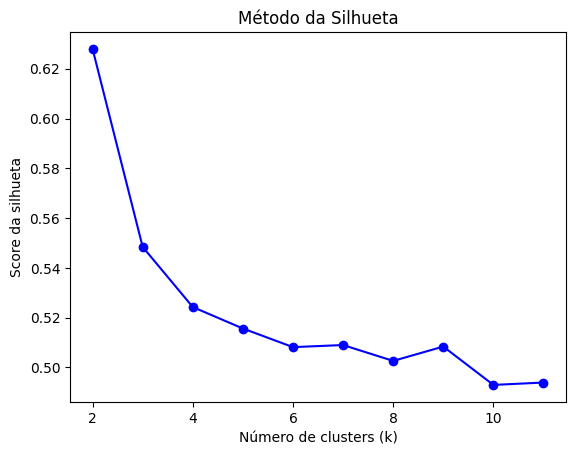

In [32]:
# Reduzindo a dimensionalidade para 2D com PCA
pca = PCA(n_components=76)
X_pca = pca.fit_transform(train)

silhouette_scores = []
k_values = range(2, 12) # Testando valores de k de 2 a 9

# Realizando a clusterização com K-Means
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(train)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(train, labels)
    silhouette_scores.append(silhouette_avg)

    
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Score da silhueta')
plt.title('Método da Silhueta')
plt.show()

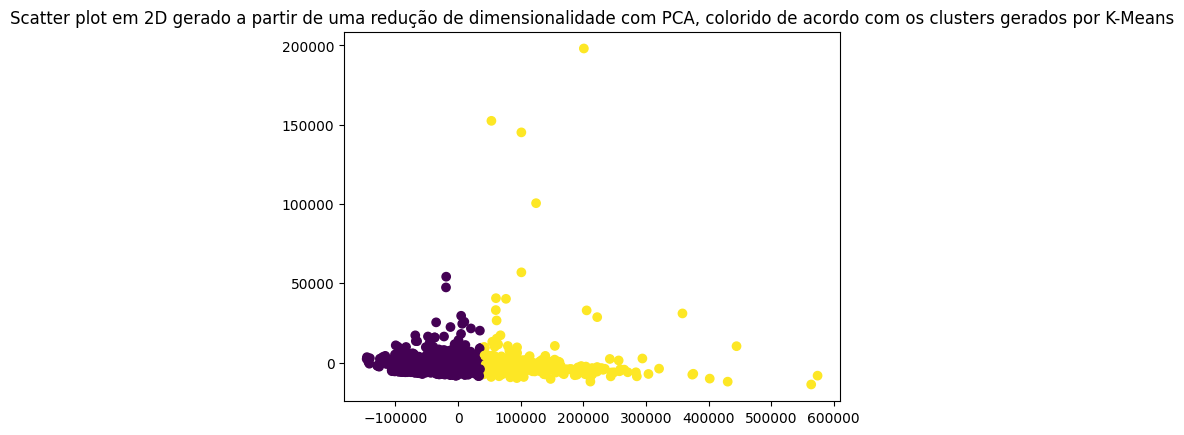

In [29]:
# Reduzindo a dimensionalidade para 2D com PCA
pca = PCA(n_components=76)
X_pca = pca.fit_transform(train)

# Realizando a clusterização com K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(train)

# Plotando o scatter plot com cores definidas pelos clusters gerados pelo K-Means
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans)
plt.title('Scatter plot em 2D gerado a partir de uma redução de dimensionalidade com PCA, colorido de acordo com os clusters gerados por K-Means')
plt.show()